# Pràctica 2: La regressió

## Objectius

Els objectius d'aquesta pràctica són:
* Aplicar models de regressió, ficant l'èmfasi en:
 * Analitzar els atributs per seleccionar els més representatius i normalitzar-los.
 * Avaluar correctament l'error del model 
 * Visualitzar les dades i el model resultant
 * Saber aplicar el procès de descens del gradient

* Ésser capaç d'aplicar tècniques de regressió en casos reals

* Validar els resultats en dades reals

* Fomentar la capacitat per presentar resultats tècnics d'aprenentatge computacional de forma adequada davant altres persones


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent dijous abans de les 23:59, és a dir, tindreu les hores de classe més tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Generalment, per tal de que veigueu varietat de dades i problematiques, es treballarà sobre dues bases de dades cada setmana. La primera serà comuna per tothom i, en aquest cas, tindrá la temática del COVID. La segona, tot i ser de lliure elecció (us deixem que l'escolliu vosaltres mateixos), haurà de tenir uns mínims de dificultat (o almenys, que tinguin una mica de gràcia). 


#### COVID data

Durant el primer mes, treballarem amb una base de dades comuna, amb la temática del COVID-19. Podeu trobar la darrera actualització a [OWID DATA](https://github.com/owid/covid-19-data/tree/master/public/data), tot i que no farem servir cap dada a partir del 1 de Octubre de 2020, per això us recomanem de fer servir la que tenim penjada al Campus Virtual.

#### Dataset lliure elecció
Podeu trobar datasets de dades a qualsevol d'aquestes dues webs:
* https://www.kaggle.com/datasets?search=machine+learning
* https://archive.ics.uci.edu/ml/datasets.php

L'objectiu será escollir un dataset adequat per la tasca que volem realitzar. LLavors, el primer apartat serà conèixer la base de dades que es té entre mans. S'han d'analitzar els diferents atributs que la composen, entendre'ls i, si no està estipulat, **caldrà fixar quin es l'atribut objectiu a predir de tots els que hi ha a la base de dades**, justificant el per què de la decisió (és útil i representatiu pel problema, per exemple, donat un conjunt de dades sobre persones: edat, gènere, pes, alçada, risc de patir càncer, aquesta última pot ser justificada com la de més interés). També podeu mirar que l'atribut objectiu tingui valors que canvien. Per exemple, no té sentit predir un atribut on el 99% dels valors són 0, i hi ha algun 1.


### Pràctica 2: Regressió Lineal i Polinomial
En aquesta pràctica es presenten diversos problemes per comprendre els mètodes de regressió numèrica. Cada apartat pot tenir una qualificació diferent.

* A. Exploració de la base de dades (30%)
* B. Ús de regressor Lineal (30%)
* C. Demostració d'assoliment (A+B en una nova BBDD) (20%)
* D. Implementació Regressor Lineal (20%)
* (Extra) Implementació Regresor polinomial (+10%, max: 10pts)



A continuació us posem un esquelet de codi que podeu tenir com a referència (o no)

In [1]:
# Codi esquelet per la pràctica de la 2 sessió: Regressió Lineal i Polinomial

import numpy as np
import pandas as pd
import operator
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('owid-covid-data.csv')

print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (120568, 65)


A continuació veurem algunes taules i gràfiques per entendre com són les dades que tenim:

In [2]:
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.000,5.000,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120563,ZWE,Africa,Zimbabwe,2021-09-27,129919.000,294.000,247.571,4607.000,3.000,5.429,8608.371,19.480,16.404,305.258,0.199,0.360,1.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.880,20.220,14.660,NaN,2073.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN
120564,ZWE,Africa,Zimbabwe,2021-09-28,130272.000,353.000,298.000,4615.000,8.000,6.571,8631.760,23.390,19.745,305.788,0.530,0.435,1.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.050,20.280,14.780,NaN,1953.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN
120565,ZWE,Africa,Zimbabwe,2021-09-29,130485.000,213.000,240.143,4616.000,1.000,3.429,8645.873,14.113,15.912,305.854,0.066,0.227,1.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.250,20.350,14.900,NaN,1865.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN
120566,ZWE,Africa,Zimbabwe,2021-09-30,130820.000,335.000,240.857,4623.000,7.000,3.286,8668.070,22.197,15.959,306.318,0.464,0.218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.490,20.430,15.050,NaN,1792.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN


In [3]:
dataset.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,...,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,114508.000,114505.000,113490.000,103733.000,103888.000,113490.000,113905.000,113902.000,112892.000,103143.000,103298.000,112892.000,97209.000,13680.000,13680.000,15733.000,15733.000,1253.000,1253.000,2152.000,2152.000,51915.000,51988.000,51988.000,51915.000,...,27597.000,26249.000,23210.000,2932.000,49151.000,100287.000,119751.000,111478.000,106469.000,105285.000,105885.000,107098.000,71855.000,106751.000,110063.000,83345.000,82135.000,53636.000,97058.000,114378.000,106842.000,4129.000,4129.000,4275.000,4129.000
mean,1422928.236,6460.530,6478.195,36144.056,145.552,132.535,17599.630,83.249,83.244,368.821,1.569,1.421,1.006,943.537,22.301,4244.712,148.946,212.996,16.547,2850.455,78.467,54618.938,10562369.364,443.984,2.425,...,43.671,26.184,19.726,1.621,3484.554,57.020,122599462.209,397.313,30.521,8.762,5.544,19256.811,13.482,259.264,8.014,10.593,32.737,50.742,3.024,73.260,0.727,28797.992,8.190,15.037,701.843
std,9531309.248,39383.642,38973.283,215404.740,793.439,741.948,30051.437,193.750,163.765,625.768,4.155,3.071,0.346,2913.911,25.260,11830.127,196.512,496.433,31.223,10203.504,136.177,192003.653,44592817.815,1082.089,6.516,...,45.223,24.385,21.545,4.872,4343.613,20.721,677009588.349,1851.897,9.124,6.192,4.223,20067.037,19.984,119.328,4.276,10.505,13.505,31.753,2.453,7.542,0.150,83446.267,16.123,31.190,1097.895
min,1.000,-74347.000,-6223.000,1.000,-1918.000,-232.143,0.001,-3125.829,-272.971,0.001,-75.911,-10.844,-0.050,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,47.000,0.137,15.100,1.144,0.526,661.240,0.100,79.370,0.990,0.100,7.700,1.188,0.100,53.280,0.394,-31959.400,-27.350,-95.920,-1728.844
25%,1962.000,3.000,9.143,67.000,0.000,0.000,341.505,0.279,1.537,10.179,0.000,0.000,0.840,25.000,3.378,107.000,20.538,5.091,1.431,38.000,8.205,2028.000,228448.750,19.633,0.177,...,5.090,3.840,2.270,0.000,511.000,42.590,2078723.000,36.253,22.200,3.466,2.063,4449.898,0.600,168.711,5.310,1.900,21.600,19.351,1.300,67.920,0.602,-292.600,-1.600,-1.555,-65.793
50%,20280.500,92.000,114.143,599.000,2.000,1.714,2672.154,10.616,14.545,67.531,0.151,0.191,1.010,122.000,12.391,504.000,67.676,26.014,5.704,225.058,30.468,7345.000,1146945.000,99.703,0.720,...,26.340,18.290,10.645,0.010,2191.000,58.330,9634162.000,83.479,29.700,6.378,3.871,12895.635,2.200,243.811,7.110,6.300,31.400,49.839,2.400,74.620,0.744,1279.200,4.520,5.640,271.653
75%,210404.500,922.000,972.964,5109.000,19.000,15.714,21107.351,81.031,90.479,444.398,1.369,1.350,1.170,549.000,34.192,2275.000,201.347,138.855,17.913,1157.591,98.171,28134.000,4708699.750,407.193,2.214,...,73.340,45.270,32.430,0.333,5123.000,72.690,33933611.000,209.588,39.100,14.178,8.678,27216.445,21.200,329.942,10.080,19.300,41.100,82.502,3.861,78.740,0.848,17379.800,13.170,21.185,1194.686
max,234286537.000,905948.000,826439.429,4791862.000,17977.000,14722.857,217440.097,8620.690,3385.

In [4]:
covid_spain = dataset[dataset.location=="Spain"]
covid_italy = dataset[dataset.location=="Italy"]
covid_spain

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
101987,ESP,Europe,Spain,2020-02-01,1.000,1.000,NaN,NaN,NaN,NaN,0.021,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.110,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.904,NaN,NaN,NaN,NaN
101988,ESP,Europe,Spain,2020-02-02,1.000,0.000,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.963,0.063,17.777,0.380,...,NaN,NaN,NaN,NaN,NaN,11.110,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.904,-3085.800,-6.050,-0.900,-66.013
101989,ESP,Europe,Spain,2020-02-03,1.000,0.000,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.110,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.904,NaN,NaN,NaN,NaN
101990,ESP,Europe,Spain,2020-02-04,1.000,0.000,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.110,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.904,NaN,NaN,NaN,NaN
101991,ESP,Europe,Spain,2020-02-05,1.000,0.000,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.110,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.904,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102591,ESP,Europe,Spain,2021-09-27,4951640.000,5039.000,2300.857,86298.000,69.000,56.714,105928.284,107.797,49.221,1846.136,1.476,1.213,0.810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,149.610,80.500,78.090,NaN,1558.000,NaN,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.904,NaN,NaN,NaN,NaN
102592,ESP,Europe,Spain,2021-09-28,4953930.000,2290.000,2278.000,86358.000,60.000,53.571,105977.273,48.989,48.732,1847.419,1.284,1.146,0.810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,149.800,80.560,78.230,NaN,1446.000,NaN,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.904,NaN,NaN,NaN,NaN
102593,ESP,Europe,Spain,2021-09-29,4956691.000,2761.000,2266.714,86397.000,39.000,44.571,106036.338,59.065,48.491,1848.254,0.834,0.953,0.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,149.930,80.610,78.330,NaN,1350.000,NaN,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.904,NaN,NaN,NaN,NaN
102594,ESP,Europe,Spain,2021-09-30,4959091.000,2400.000,2176.571,86415.000,18.000,32.857,106087.680,51.342,46.562,1848.639,0.385,0.703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150.080,80.660,78.440,NaN,1261.000,NaN,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31

In [5]:
dataset["datetime"] = pd.to_datetime(dataset["date"], format='%Y-%m-%d', errors='ignore') # Genera una sèrie del tipus str
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,datetime
0,AFG,Asia,Afghanistan,2020-02-24,5.000,5.000,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN,2020-02-24
1,AFG,Asia,Afghanistan,2020-02-25,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN,2020-02-25
2,AFG,Asia,Afghanistan,2020-02-26,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN,2020-02-26
3,AFG,Asia,Afghanistan,2020-02-27,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN,2020-02-27
4,AFG,Asia,Afghanistan,2020-02-28,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN,2020-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120563,ZWE,Africa,Zimbabwe,2021-09-27,129919.000,294.000,247.571,4607.000,3.000,5.429,8608.371,19.480,16.404,305.258,0.199,0.360,1.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.220,14.660,NaN,2073.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN,2021-09-27
120564,ZWE,Africa,Zimbabwe,2021-09-28,130272.000,353.000,298.000,4615.000,8.000,6.571,8631.760,23.390,19.745,305.788,0.530,0.435,1.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.280,14.780,NaN,1953.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN,2021-09-28
120565,ZWE,Africa,Zimbabwe,2021-09-29,130485.000,213.000,240.143,4616.000,1.000,3.429,8645.873,14.113,15.912,305.854,0.066,0.227,1.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.350,14.900,NaN,1865.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN,2021-09-29
120566,ZWE,Africa,Zimbabwe,2021-09-30,130820.000,335.000,240.857,4623.000,7.000,3.286,8668.070,22.197,15.959,306.318,0.464,0.218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.430,15.050,NaN,1792.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN,2021-09-30


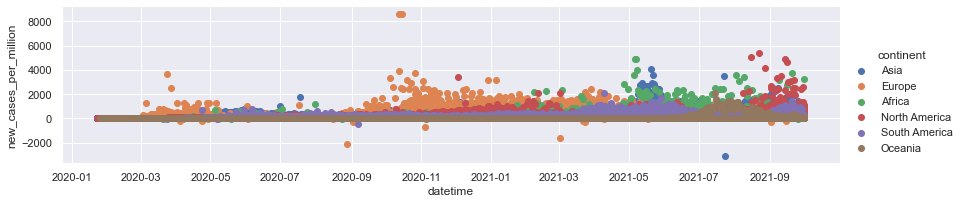

In [6]:
fg = sns.FacetGrid(data=dataset, hue='continent',aspect=4) # Permet mostrar dades alhora (continents) hue es colors
# fg = sns.FacetGrid(data=dataset, row='continent',aspect=4) # Genera una gràfica per continents (en columna)
fg.map(plt.scatter, 'datetime', 'new_cases_per_million').add_legend() # scatter (punts) x=datetime, y=

Quina correlació entre aquests atributs hi veieu?


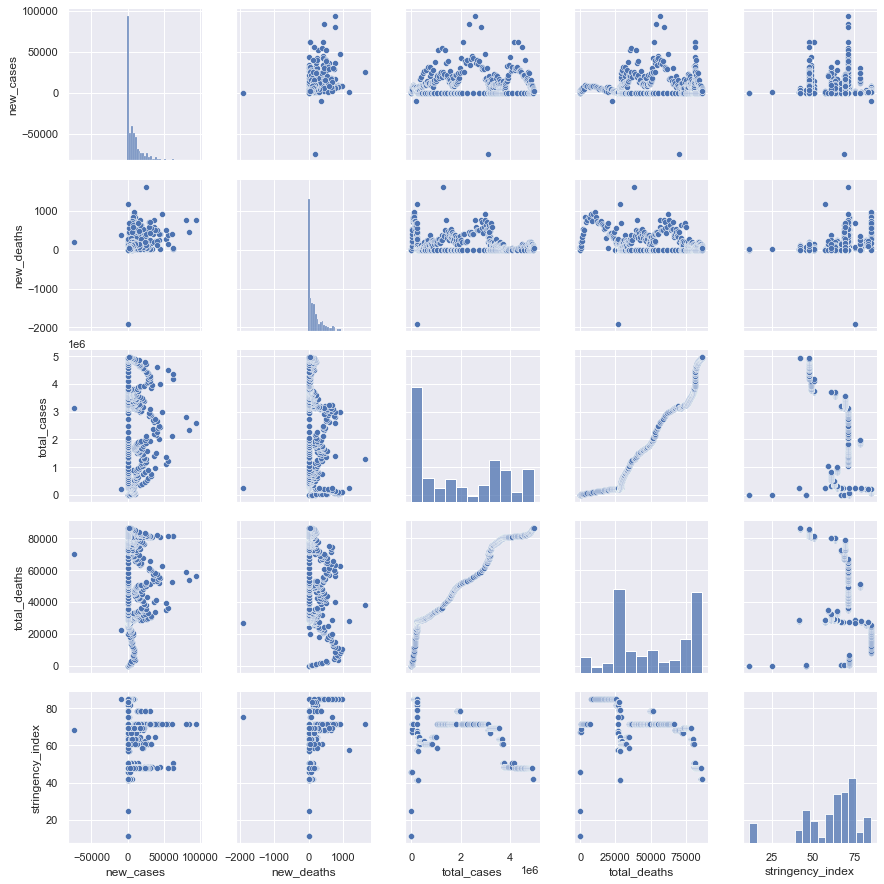

In [7]:
print("Quina correlació entre aquests atributs hi veieu?")

selected_columns = ["location", "new_cases", "new_deaths", "total_cases", "total_deaths", "stringency_index"] # location no perquè no es númeric
sns.pairplot(covid_spain[selected_columns])
plt.show()
# les dades son brutes (i.e: -2000 morts)

Què passa si utilitzem les dades smoothed?


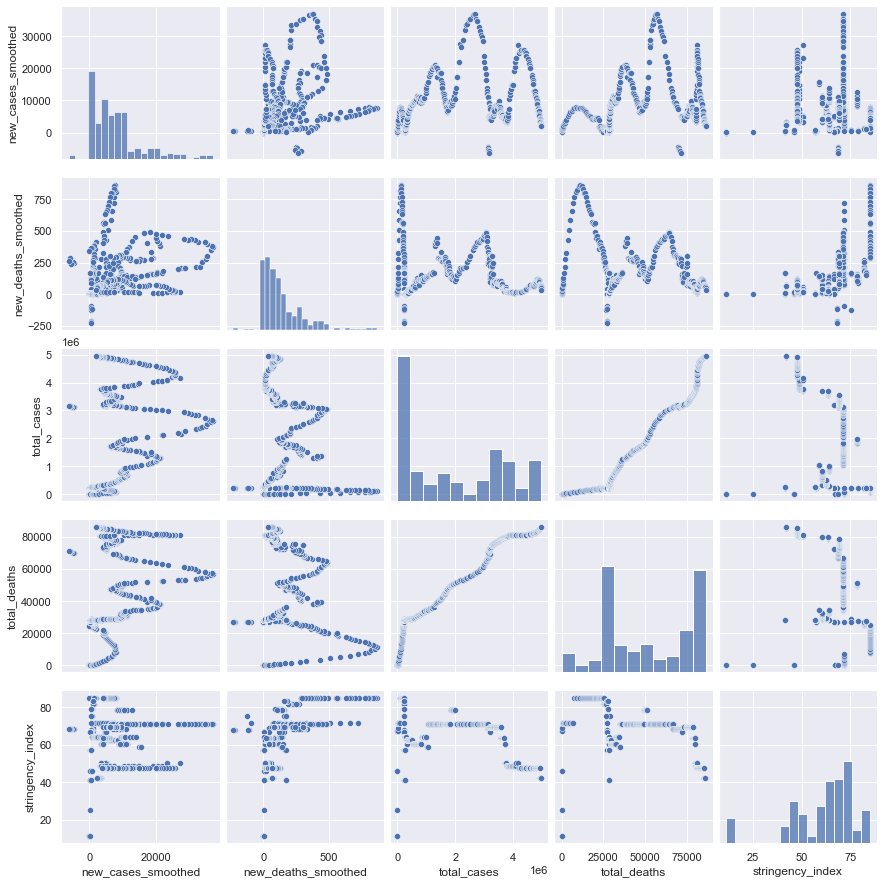

In [8]:
print("Què passa si utilitzem les dades smoothed?")

selected_columns = ["location", "new_cases_smoothed", "new_deaths_smoothed", "total_cases", "total_deaths", "stringency_index"]
sns.pairplot(covid_spain[selected_columns])
plt.show()

In [9]:
print("I si busquem alguna correlació entre paisos per un dia concret?")

covid_agost = dataset[dataset.date=="2020-08-01"]
covid_agost

I si busquem alguna correlació entre paisos per un dia concret?


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,datetime
159,AFG,Asia,Afghanistan,2020-08-01,36796.000,168.000,96.286,1287.000,12.000,5.286,923.700,4.217,2.417,32.308,0.301,0.133,0.780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.700,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN,2020-08-01
756,OWID_AFR,NaN,Africa,2020-08-01,944997.000,16922.000,16605.714,19974.000,294.000,350.429,688.028,12.320,12.090,14.543,0.214,0.255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1373486472.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-01
1341,ALB,Europe,Albania,2020-08-01,5396.000,120.000,108.429,161.000,4.000,3.857,1878.219,41.769,37.741,56.040,1.392,1.343,1.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,62.960,2872934.000,104.871,38.000,13.188,8.643,11803.431,1.100,304.195,10.080,7.100,51.200,NaN,2.890,78.570,0.795,NaN,NaN,NaN,NaN,2020-08-01
1926,DZA,Africa,Algeria,2020-08-01,30950.000,556.000,598.000,1223.000,13.000,11.000,693.688,12.462,13.403,27.411,0.291,0.247,0.960,64.000,1.434,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.630,44616626.000,17.348,29.100,6.211,3.857,13913.839,0.500,278.364,6.730,0.700,30.400,83.741,1.900,76.880,0.748,NaN,NaN,NaN,NaN,2020-08-01
2505,AND,Europe,Andorra,2020-08-01,925.000,0.000,4.000,52.000,0.000,0.000,11958.011,0.000,51.710,672.234,0.000,0.000,1.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,41.670,77354.000,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.970,29.000,37.800,NaN,NaN,83.730,0.868,NaN,NaN,NaN,NaN,2020-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117668,VNM,Asia,Vietnam,2020-08-01,590.000,32.000,24.714,3.000,0.000,0.429,6.010,0.326,0.252,0.031,0.000,0.004,1.760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.630,98168829.000,308.127,32.600,7.150,4.718,6171.884,2.000,245.465,6.000,1.000,45.900,85.847,2.600,75.400,0.704,NaN,NaN,NaN,NaN,2020-08-01
118477,OWID_WRL,NaN,World,2020-08-01,17854849.000,250691.000,257277.000,718270.000,6125.000,6089.857,2267.292,31.834,32.670,91.209,0.778,0.773,1.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7874965732.000,58.045,30.900,8.696,5.355,15469.207,10.000,233.070,8.510,6.434,34.635,60.130,2.705,72.580,0.737,NaN,NaN,NaN,NaN,2020-08-01
119017,YEM,Asia,Yemen,2020-08-01,1730.000,2.000,8.000,494.000,1.000,2.857,56.739,0.066,0.262,16.202,0.033,0.094,0.860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31.480,30490639.000,53.508,20.300,2.922,1.583,1479.147,18.800,495.003,5.350,7.600,29.200,49.542,0.700,66.120,0.470,NaN,NaN,NaN,NaN,2020-08-01
119580,ZMB,Africa,Zambia,2020-08-01,6228.000,265.000,271.429,165.000,14.000,3.714,329.164,14.006,14.346,8.721,0.740,0.196,1.060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,50.930,18920657.000,22.995,17.700,2.480,1.542,3689.251,57.500,234

<AxesSubplot:>

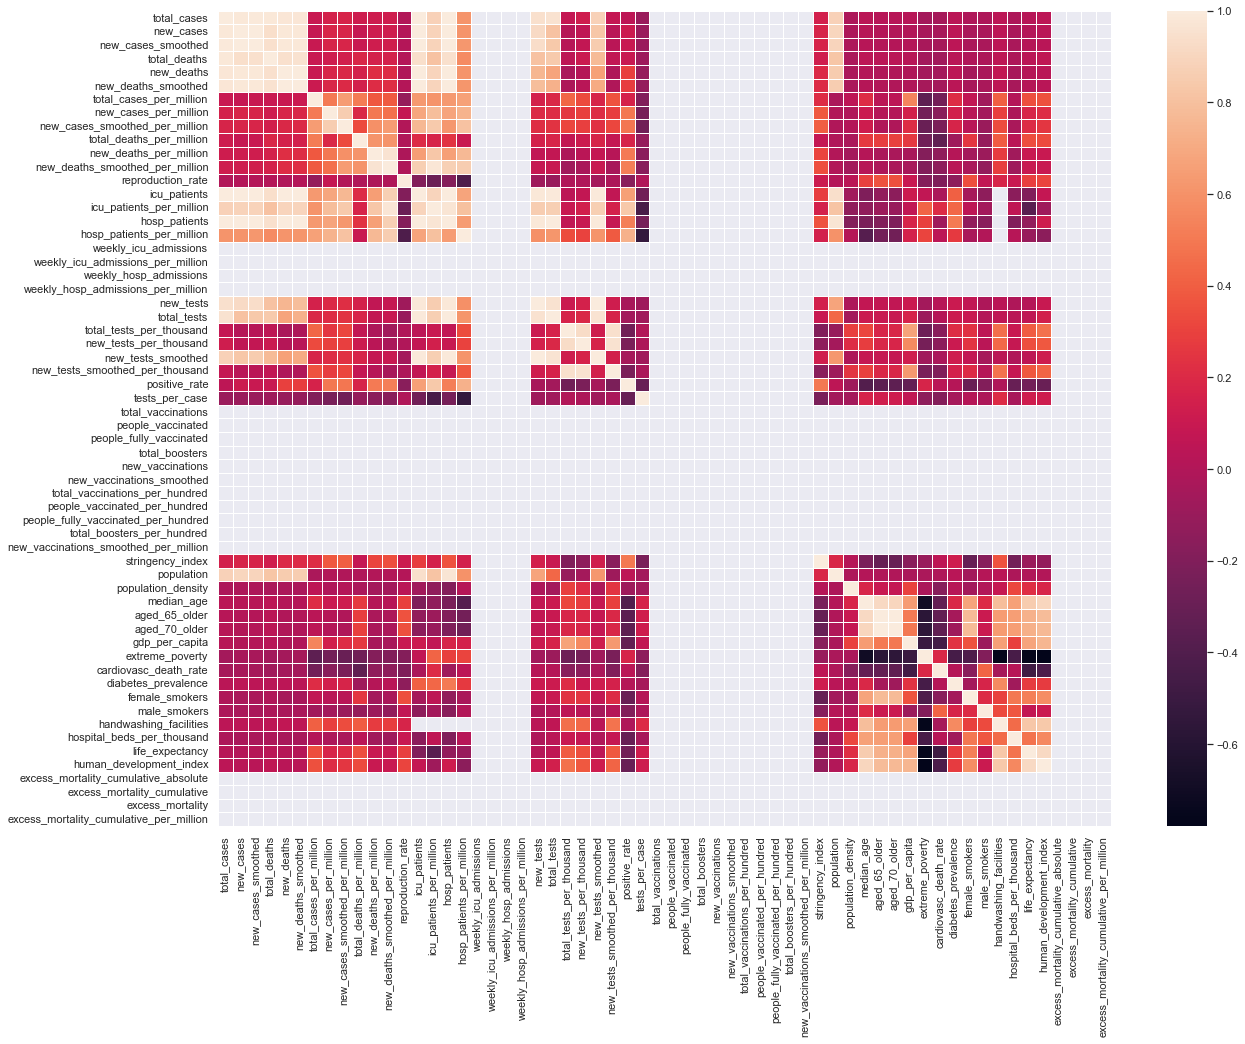

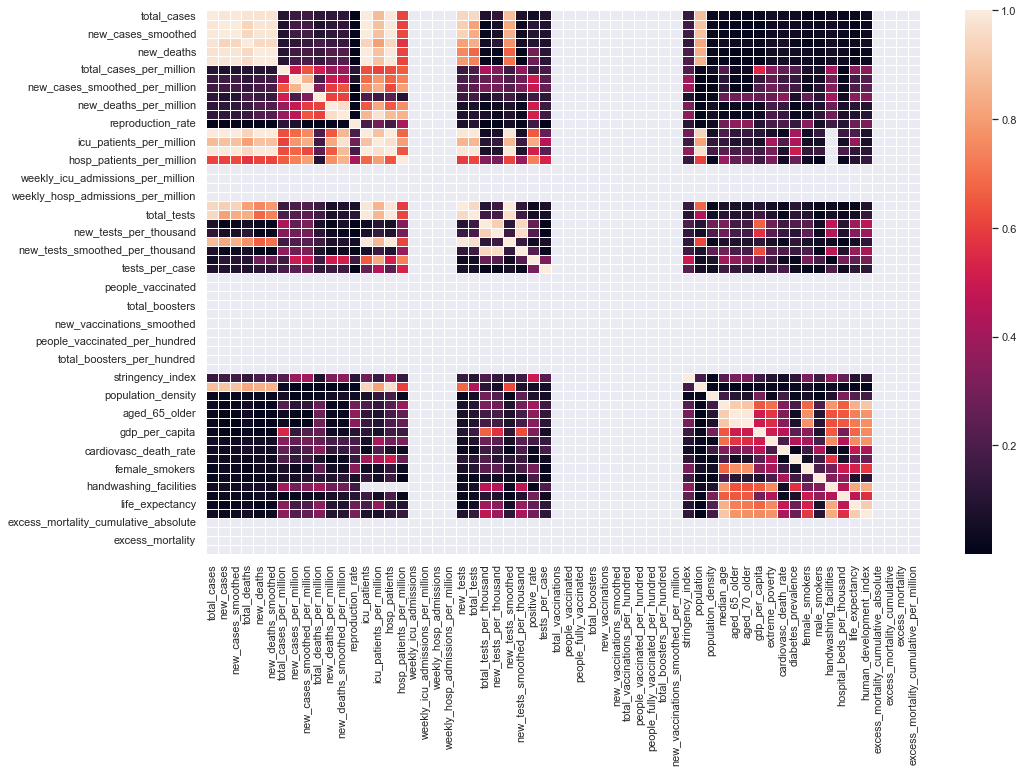

In [10]:
# Mapa de calor (de blau (no valors) a vermell (molt important) la relació entre diferentes característiques)
#  Grisos son Nan's, blanc correlació 1a1.

f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(covid_agost.corr(), annot=False, fmt="f", linewidths=.5, ax=ax)
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(abs(covid_agost.corr()), annot=False, fmt="f", linewidths=.5, ax=ax) # En valor absolut (interesa agafar caracterísitques que no estiguin correlacionades ni directa ni indirectament)

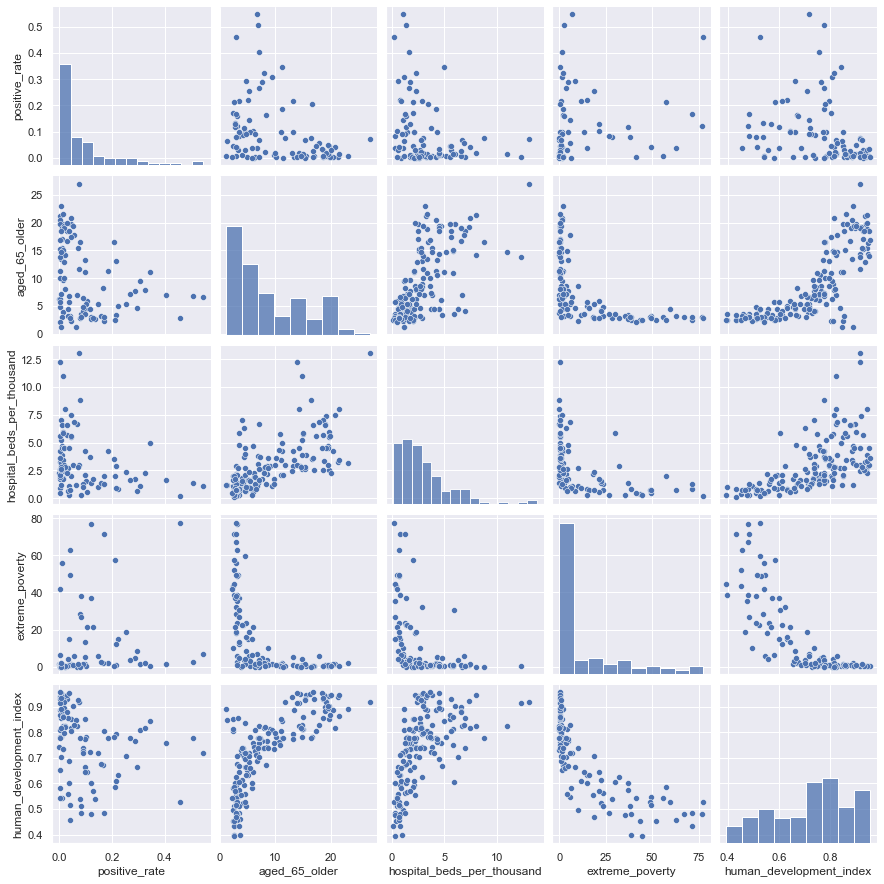

In [11]:
# Aparellament per un dia determinat de agost
selected_columns = ["positive_rate", "aged_65_older", "hospital_beds_per_thousand", "extreme_poverty", "human_development_index"]
sns.pairplot(covid_agost[selected_columns])


## A. Exploració de la base de dades (20%)

En aquest apartat aprendrem a analitzar les dades de la base de dades. Les següents funcions ens poden anar bé:

* [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
* [DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
* [DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
* [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Podeu veure algunes idees de 
https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction

Descripció dels camps:
https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv



### Preguntes a respondre
1. Dimensionalitat de la BBDD. Quants exemples, quantes caracteristiques tenim.
2. Com són les caracteristiques?
3. Hi tenim totes les dades (quin % de dades tenim). Neteja les dades que puguin usar-se per aprendre.
4. Quin tipus de atributs tenim a la base de dades. Neteja les dades que ens siguin útils.
5. Mostra els atributs més rellevants. (llista de parelles d'atributs ordenada per correlació)
6. Quins atributs están més correlacionats. Mostra'ls.
7. Mostra (almenys) 3 tipus diferents de gràfiques sobre les dades.
8. Els valors es troben tots a la mateixa escala? Ens importa?
9. Quins atributs tenen una distribució Guassiana?
10. Quin és l'atribut objectiu? Per què?


> ## Dimensionalitat de la BBBD 

##### 1. Dimensionalitat de la BBDD. Quants exemples, quantes caracteristiques tenim.
La BBDD amb la qual estem treballant té 120568 files i 65 columnes. És a dir, tenim 120568 mostres diferents amb 65 característiques cadascuna.

In [12]:
def load_dataset(path):
    data = pd.read_csv(path, header=0, delimiter=',')
    row, col = data.shape

    return dataset, row, col

dataset_path = "owid-covid-data.csv"
data, row, col = load_dataset(dataset_path) 

print(f"Dimensions BD\nFiles: {row}\nColumnes: {col}")
print(f"En total hi ha: {len(data.columns)} característiques.")

Dimensions BD
Files: 120568
Columnes: 65
En total hi ha: 66 característiques.


> ## Filtratge 
> ### Tipos de dades

##### 2. Com són les caracteristiques?

Donada que la regressió només funciona per aquells atributs numèrics, és imprescindible saber el tipus de cada característica de la BBDD. D'aquesta manera, poder descartar aquells que no ens interessin en un futur.

Fem una primera aproximació per fer-nos a la idea de quants i quins valors són numèrics i quins no. Veiem que de 65 característiques (columnes), 60 d'aquestes tenen atributs del tipus numèrics (float64). Cinc d'aquestes columnes no són numèriques, sinó Objectes.

In [13]:
def dataset_types(dataset):
    dataTypeSeries = dict(dataset.dtypes) 
    print(dataset.dtypes.value_counts())

    return dataTypeSeries

dataTypeSeries = dataset_types(data) # Podem consultar el 'type' d'una columna en qualsevol moment


float64           60
object             5
datetime64[ns]     1
dtype: int64


> ### Dades nules

#### 3. Hi tenim totes les dades (quin % de dades tenim). Neteja les dades que puguin usar-se per aprendre.

Aquesta regressió no accepta valors nuls (Nan's). Com a començament de partida, una bona idea és saber i descartar aquelles característiques (columnes) on la majoria dels seus valors són nuls. Primer anem a veure el percentatge de valors nuls que tenim en cada columna.

Si plotejem aquests valors, veiem que hi ha moltes columnes amb dades null, podem considerar que acceptem fins al 60% de dades null. En aquest cas, prendrem el 60% per no eliminar masses dades en aquest filtratge.

{'weekly_icu_admissions_per_million': 98.96,
 'weekly_icu_admissions': 98.96,
 'weekly_hosp_admissions_per_million': 98.22,
 'weekly_hosp_admissions': 98.22,
 'total_boosters': 97.57,
 'total_boosters_per_hundred': 97.57,
 'excess_mortality_cumulative': 96.58,
 'excess_mortality_cumulative_absolute': 96.58,
 'excess_mortality_cumulative_per_million': 96.58,
 'excess_mortality': 96.45,
 'icu_patients': 88.65,
 'icu_patients_per_million': 88.65,
 'hosp_patients_per_million': 86.95,
 'hosp_patients': 86.95,
 'new_vaccinations': 81.03,
 'people_fully_vaccinated_per_hundred': 80.75,
 'people_fully_vaccinated': 80.75,
 'people_vaccinated': 78.23,
 'people_vaccinated_per_hundred': 78.23,
 'total_vaccinations': 77.11,
 'total_vaccinations_per_hundred': 77.11,
 'new_vaccinations_smoothed': 59.23,
 'new_vaccinations_smoothed_per_million': 59.23,
 'new_tests': 56.94,
 'new_tests_per_thousand': 56.94,
 'total_tests': 56.88,
 'total_tests_per_thousand': 56.88,
 'handwashing_facilities': 55.51,
 'te

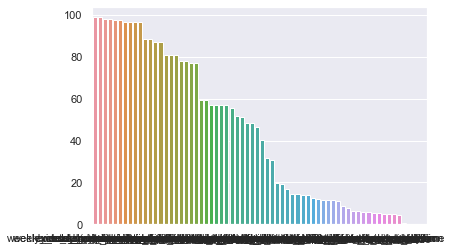

In [14]:
def percent_null(dataset):
    percent_data_missing = round(dataset.isna().mean().round(4) * 100, 4)
    percent_data_missing = dict(percent_data_missing.sort_values(ascending=False))
    
    sns.barplot(x=list(percent_data_missing.keys()), y=list(percent_data_missing.values()))
    
    return percent_data_missing

percent_data_missing = percent_null(data)
percent_data_missing

Veiem que són poques les característiques amb pocs o cap valor null, entre elles: pupulation, date, location i iso_code. Totes les altres haurem de tractar-les d'alguna manera per eliminar aquests valors nuls.

Per començar el filtratge, podem eliminar aquelles columnes on quasi tots els valors siguin Nan. Com hem dit, en aquest cas, el criteri que seguim és eliminar aquelles columnes que tinguin un 60% valors null. Triem aquest precentatge, ja que si deixem columnes amb molts nans, després, a l'eliminar qualsevol fila que contingui un valor nan, ens quedaran molt poques dades, ja que alguna de les columnes que hauríem deixat introduirien molts valors Nan a les files.

> ### Neteja de Dades (Nan's i no numeriques)

#### 4. Quin tipus de atributs tenim a la base de dades. Neteja les dades que ens siguin útils. 

Veiem que de 65 característiques (columnes), 60 d'aquestes tenen atributs del tipus númerics (float64). Cinc d'aquestes columnes no son númeriques, sinó Objectes. Donat que la regresió només treballa amb atributs númerics, haurem de eliminar o prescindir d'aquestes 5 columnes restants.

In [15]:
def remove_percent_null_data(dataset, threeshold = 50):
    # data = data.loc[:, data.isnull().mean() < .6] # També ho podem fer amb una línia
    atributs_descartats = []
    for clau, valor in percent_data_missing.items():
        if valor >= threeshold:
            atributs_descartats.append(clau)

    data = dataset.drop(atributs_descartats, axis = 1)

    print(f"En toal s'eliminaràn: {len(atributs_descartats)} columnes.")
    print(f"Aquestes son les columnes que s'eliminaràn: {atributs_descartats}")

    return data

data = remove_percent_null_data(data)
data.shape

En toal s'eliminaràn: 30 columnes.
Aquestes son les columnes que s'eliminaràn: ['weekly_icu_admissions_per_million', 'weekly_icu_admissions', 'weekly_hosp_admissions_per_million', 'weekly_hosp_admissions', 'total_boosters', 'total_boosters_per_hundred', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative_per_million', 'excess_mortality', 'icu_patients', 'icu_patients_per_million', 'hosp_patients_per_million', 'hosp_patients', 'new_vaccinations', 'people_fully_vaccinated_per_hundred', 'people_fully_vaccinated', 'people_vaccinated', 'people_vaccinated_per_hundred', 'total_vaccinations', 'total_vaccinations_per_hundred', 'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million', 'new_tests', 'new_tests_per_thousand', 'total_tests', 'total_tests_per_thousand', 'handwashing_facilities', 'tests_per_case', 'positive_rate']


(120568, 36)

Un cop fet el filtratge per columnes, el que farem ara és filtratge per files. En aquest cas, eliminarem qualsevol fila que contingui almenys un valor Nan. Recordem que ho fem perquè la regressió no treballa amb un altra cosa que no siguin valors numèrics.

In [16]:
def remove_null_data(dataset):
    dataset = dataset.dropna()
    dataset = dataset.reset_index(drop=True)

    return dataset

data = remove_null_data(data)
data.shape

(35014, 36)

Un cop feta la primera neteja, ja no tenim dades nul·les. En aquest punt ens hem quedat amb 35.014 files i 36 característiques.

> ### Dades no numeriques

Amb la funció que hem fet **dataset_types** hem pogut veure els tipus de dades de la nostra BBDD. Com hem dit, la nostra regressió no acceptarà valors nuls (cosa que ja hem controlat). Ara només queda eliminar aquelles característiques que no siguin numèriques.

In [54]:
def remove_no_numeric(dataset):
    non_numeric = []
    for col in dataset:
        if dataset[col].dtypes not in ["float64", "int64"]:
            non_numeric.append(col)

    data = dataset.drop(columns=non_numeric)
    dataset_types(dataset)
    
    return data

data = remove_no_numeric(data)
data.shape

float64    30
dtype: int64


(35014, 30)

Amb la nostra solució, podria haver passat que haguéssim eliminat masses dades. En el cas de tenir poques dades i que passes això, un altra solució seria canviar els valors nuls per la mitjana dels valors, però hem de tenir en compte que fent això ens estarem inventant dades i haurem d'analitzar els resultats que obtinguem amb pinces. En aquest cas, al parlar d'una pandèmia, és crític evitar inventar-se dades, ja que la infecció i les causes de la COVID-19 pot ser molt diferent depenent del país que estiguem parlant.

Per aquest motiu, encara que hem reduït de manera important el gruix de les dades, les dades que tenim resultants són reals i podem treballar amb elles i treure conclusions sense extrapolacions.

> ## Anàlisi

Visualitzem les dades per veure com estan quedant.

In [18]:
data.head() # Veiem que els índex estàn bé i no hi ha cap valor null

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,123.000,19.000,9.714,5.000,1.000,0.571,42.813,6.613,3.381,1.740,0.348,0.199,1.220,40.000,0.014,84.260,2872934.000,104.871,38.000,13.188,8.643,11803.431,1.100,304.195,10.080,7.100,51.200,2.890,78.570,0.795
1,146.000,23.000,12.429,5.000,0.000,0.429,50.819,8.006,4.326,1.740,0.000,0.149,1.190,37.000,0.013,84.260,2872934.000,104.871,38.000,13.188,8.643,11803.431,1.100,304.195,10.080,7.100,51.200,2.890,78.570,0.795
2,174.000,28.000,15.714,6.000,1.000,0.571,60.565,9.746,5.470,2.088,0.348,0.199,1.150,47.000,0.016,84.260,2872934.000,104.871,38.000,13.188,8.643,11803.431,1.100,304.195,10.080,7.100,51.200,2.890,78.570,0.795
3,186.000,12.000,16.571,8.000,2.000,0.857,64.742,4.177,5.768,2.785,0.696,0.298,1.070,56.000,0.019,84.260,2872934.000,104.871,38.000,13.188,8.643,11803.431,1.100,304.195,10.080,7.100,51.200,2.890,78.570,0.795
4,197.000,11.000,17.286,10.000,2.000,1.143,68.571,3.829,6.017,3.481,0.696,0.398,1.030,61.000,0.021,84.260,2872934.000,104.871,38.000,13.188,8.643,11803.431,1.100,304.195,10.080,7.100,51.200,2.890,78.570,0.795


En aquest moment, el nostre dataframe ja està net. Per tant, és interessant tornar a repetir el mapa de calor que hem fet al principi. En aquest cas, no hi hauran requadres grisos, ja que tots els atributs tenen dades i són numèriques.

#### 5. Quins atributs están més correlacionats. Mostra'ls.

Una forma de veure la correlació entre atributs és mitjançant un mapa de calor.

<AxesSubplot:>

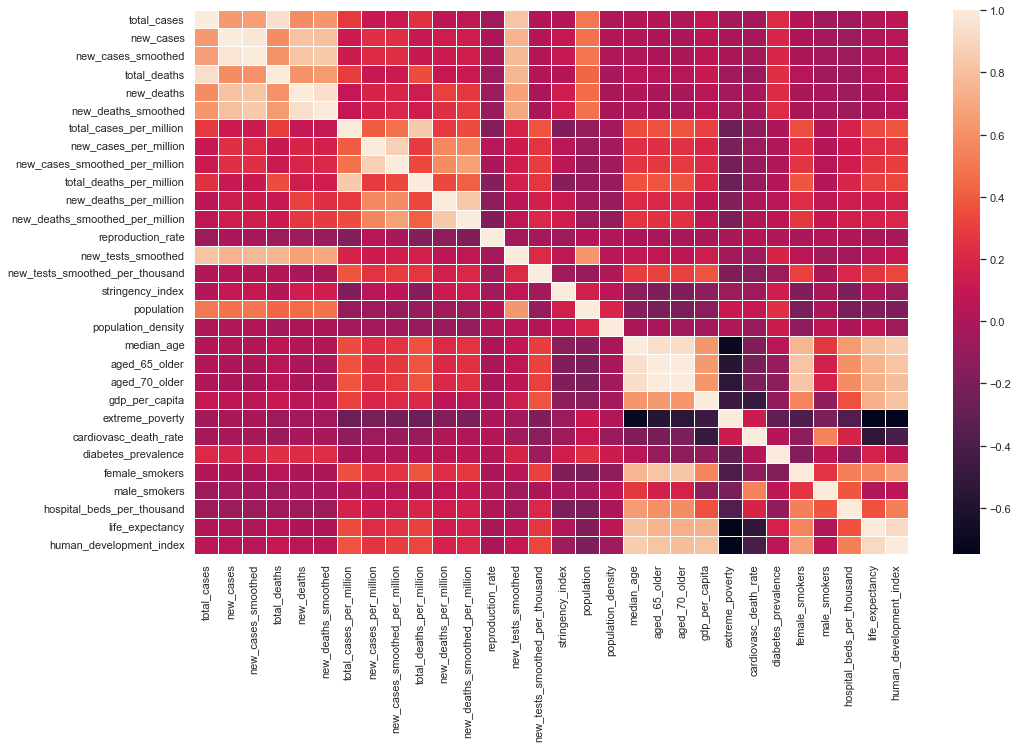

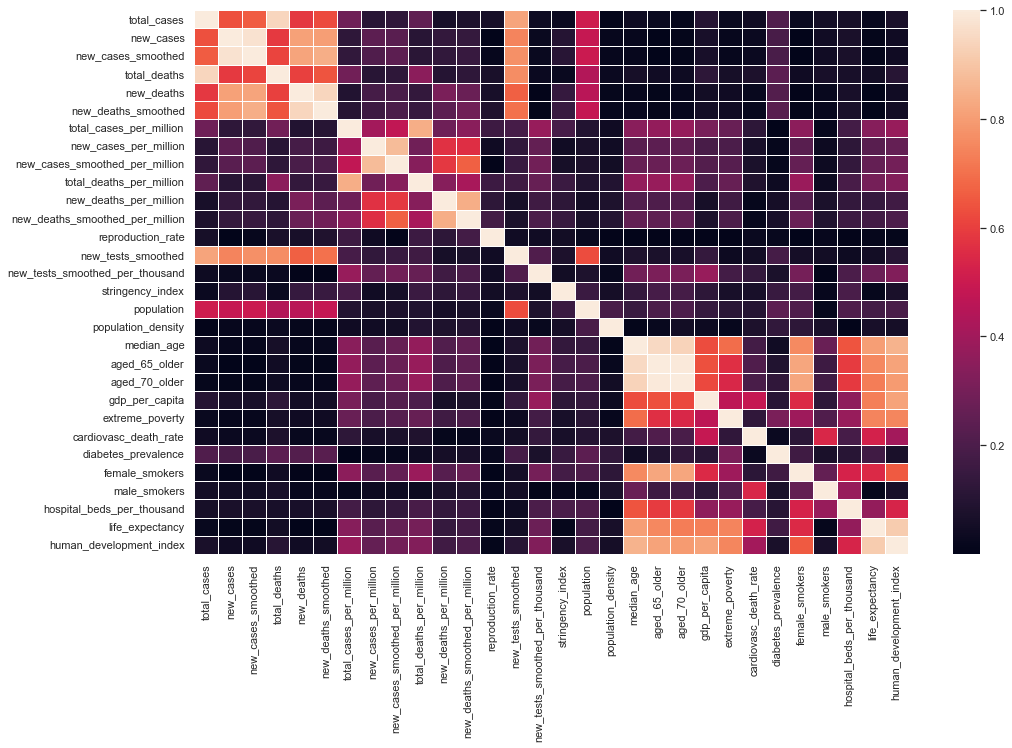

In [19]:
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(data.corr(), annot=False, fmt="f", linewidths=.5, ax=ax)
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(abs(data.corr()), annot=False, fmt="f", linewidths=.5, ax=ax) # En valor absolut (interesa agafar caracterísitques que no estiguin correlacionades ni directa ni indirectament)

Podem veure que el nostre mapa de calor està complet i no hi ha punts grisos excepte la diagonal (ja que és la correlació de l'atribut amb ell mateix).

Els punts grisos eren atributs no numèrics o dades nul·les. Amb la neteja de la BBDD que hem fet és molt més fàcil d'interpretar els resultats i d'aquesta manera només treballem amb les dades que necessitem.

Tot i això, aquest mapa de calor conté totes les característiques de la nostra BBDD, a nosaltres només ens interessen les que estiguin més correlacionades. Anem a fer una funció per veure aquelles correlacions més grans o iguals a 0.8, més petites o iguals a -0.8 (sense la diagonal).

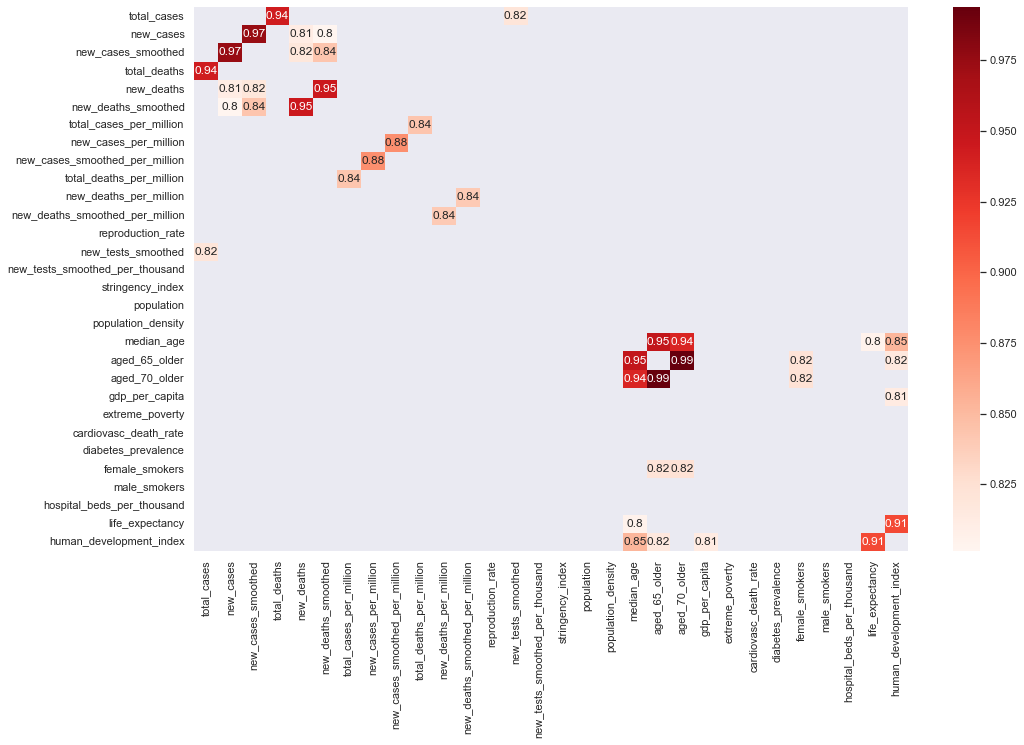

In [20]:
def heatmap_high_corr(data, thres = 0.8):
    data_corr = data.corr()
    filtered_data = data_corr[((data_corr >= thres) | (data_corr <= -thres)) & (data_corr != 1)] # != 1 ens evitem veure la diagonal
    
    plt.figure(figsize=(16,10))
    sns.heatmap(filtered_data, annot=True, cmap="Reds")
    plt.show()

    return data_corr, filtered_data

data_corr, filtered_data = heatmap_high_corr(data)


#### 6. Mostra els atributs més rellevants. (llista de parelles d'atributs ordenada per correlació)

En el mapa de calor de dalt destaquem només aquelles característiques amb les correlacions més allunyades del 0, per tant, les més significants. Així i tot, en tenir tantes característiques, és difícil veure-ho de forma gràfica.

Fem una funció per ordenar les correlacions i veure les més altes (en valor absolut).

In [21]:
pd.set_option("display.max_rows", None, "display.max_columns", None) # poder veure moltes files
def ordened_corr(data):
    filtered_data = abs(data.unstack()) # parelles atributs
    filtered_data = filtered_data.sort_values(ascending=False).drop_duplicates()

    return filtered_data

sorted_corr = ordened_corr(filtered_data)
sorted_corr

aged_70_older             aged_65_older                     0.994
new_cases                 new_cases_smoothed                0.975
aged_65_older             median_age                        0.951
new_deaths_smoothed       new_deaths                        0.945
total_cases               total_deaths                      0.943
aged_70_older             median_age                        0.936
life_expectancy           human_development_index           0.915
new_cases_per_million     new_cases_smoothed_per_million    0.875
human_development_index   median_age                        0.853
total_deaths_per_million  total_cases_per_million           0.843
new_deaths_smoothed       new_cases_smoothed                0.843
new_deaths_per_million    new_deaths_smoothed_per_million   0.840
female_smokers            aged_70_older                     0.823
                          aged_65_older                     0.822
total_cases               new_tests_smoothed                0.820
new_cases_

D'aquesta llista de paraules veiem coses òbvies com la correlació entre els **Casos totals** i les **morts totals**. També veiem correlació per exemple de la **esperança de vida** amb **índex desenvolupament humà**.

Més endavant, aquesta llista de paraules amb les correlacions ordenades ens servirà per treballar i respondre a preguntes.

> ## Gràfiques

#### 7. Mostra (almenys) 3 tipus diferents de gràfiques sobre les dades.

<AxesSubplot:xlabel='date'>

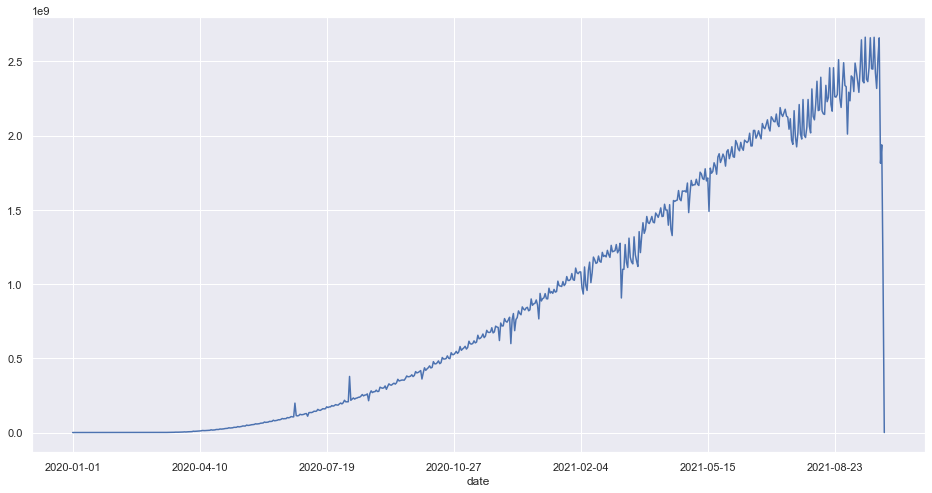

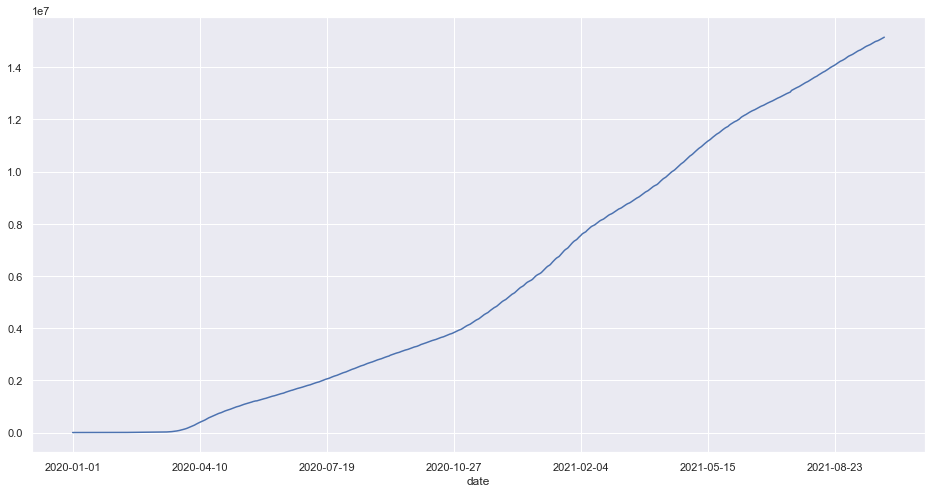

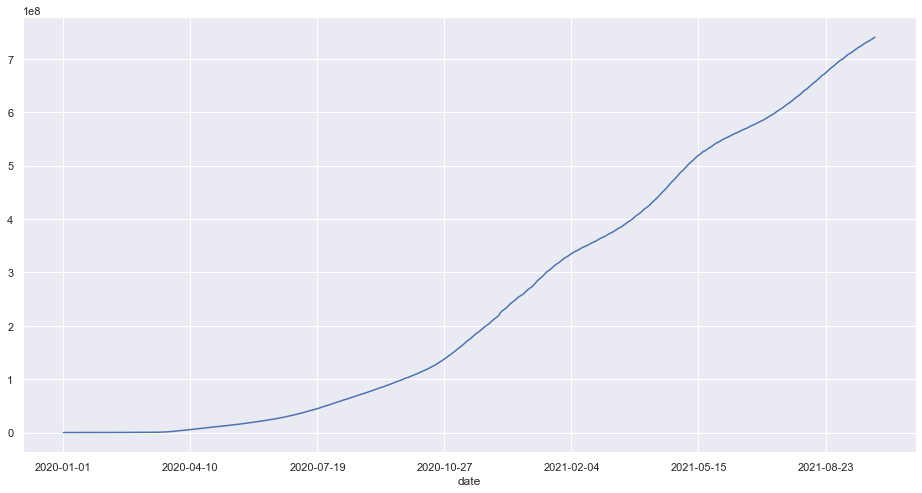

In [22]:
f, ax = plt.subplots(figsize=(16, 8))
dataset.groupby('date').sum()["total_tests"].plot(kind='line')
f, ax = plt.subplots(figsize=(16, 8))
dataset.groupby('date').sum()["total_deaths"].plot(kind='line')
f, ax = plt.subplots(figsize=(16, 8))
dataset.groupby('date').sum()["total_cases"].plot(kind='line')

D'aquestes  gràfiques veiem que a mesura que avança el temps creixen els **casos totals, tests totals i total de morts**. 

<AxesSubplot:xlabel='continent', ylabel='total_deaths_per_million'>

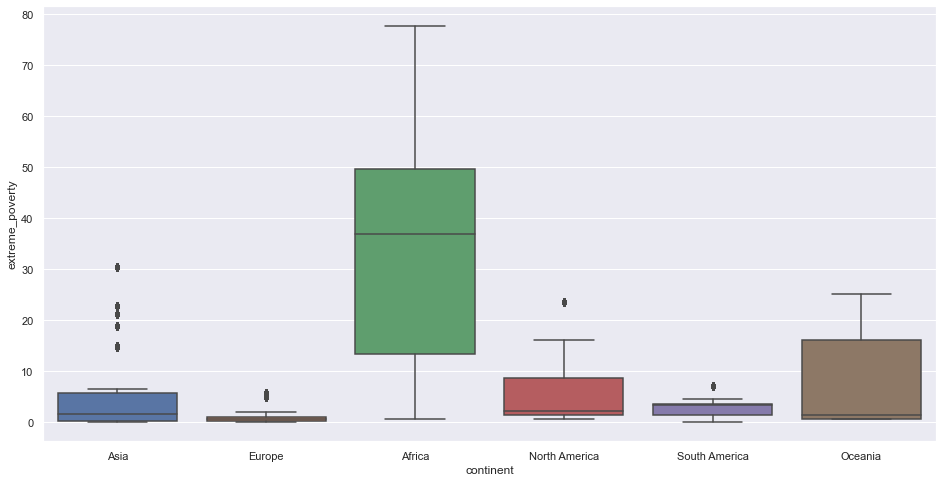

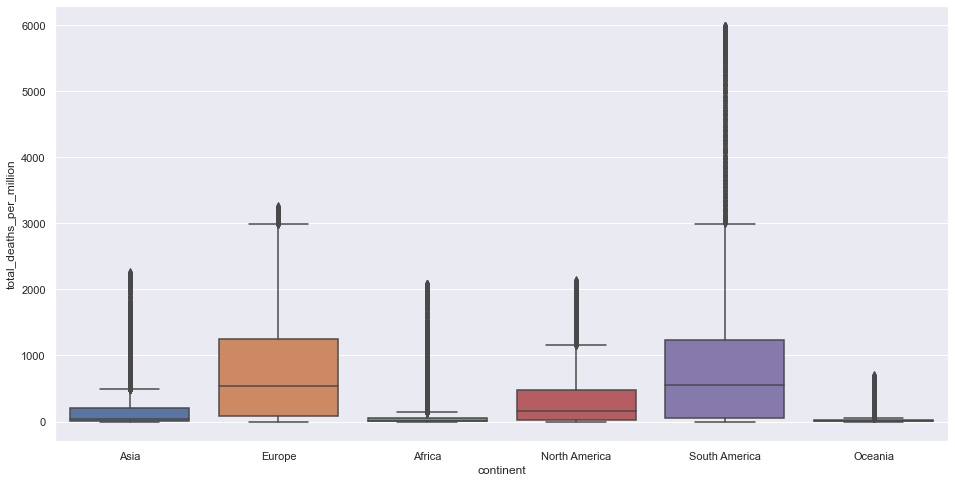

In [23]:
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data= dataset, x='continent', y='extreme_poverty')
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data= dataset, x='continent', y='total_deaths_per_million')

De la primera gràfica podem veure aquells països amb més pobresa on Àfrica destaca sobre els altres de forma clara.

El que sorprèn de la següent gràfica és que Àfrica és un dels països amb menys morts totals per milió. En aquesta, Europa i el sud d'Amèrica destaquen per sobre de la resta.

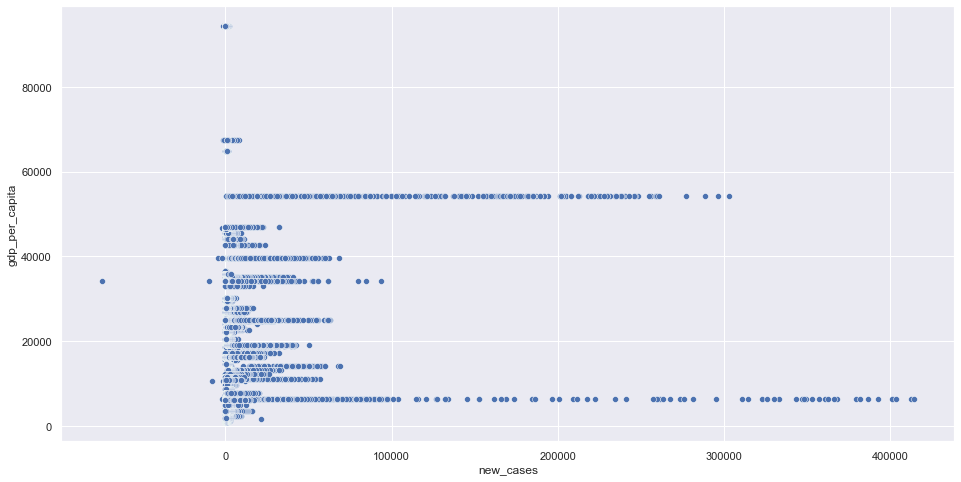

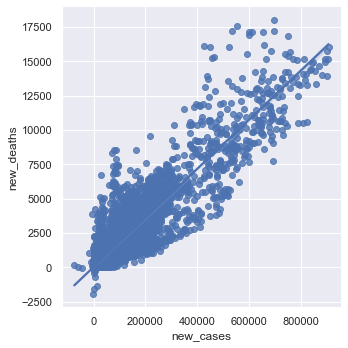

In [24]:
f, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(data=data, x="new_cases", y="gdp_per_capita")
sns.lmplot(data=dataset, x="new_cases", y="new_deaths")

La gràfica més interessant és la segona, en aquest cas veiem la correlació entre les variables **noves morts** i **nous casos**.

#### 8. Els valors es troben tots a la mateixa escala? Ens importa?

S'han agrupat un conjunt de **dades mèdiques** (per exemple new cases, new deaths), així com **dades econòmiques** (per exemple gdb per capita, extreme poverty) i socials ( per exemple life expectancy, human_development_index) de diferents països del món.

Al tenir característiques tan variades i de països amb cultures i economies molt diferents **no tots els valors de la BBDD es troben a la mateixa escala.**

Aquest és un factor molt important a tenir en compte a l'hora de treballar amb les dades. Ja que en fer la Regressió Lineal poden haver-hi característiques amb valors molt petits que comparat amb altres més elevats faci que no totes les característiques es tinguin en compte de la mateixa manera.

La solució a aquesta descompensació de les dades és la **normalització**.

#### 9. Quins atributs tenen una distribució Guassiana?

L'únic atribut que sembla tenir la distribució gaussiana és 'stringency_index'. **(Obrir per veure codi i gràfiques)**

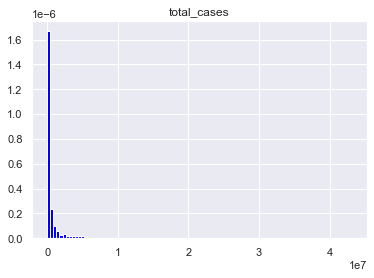

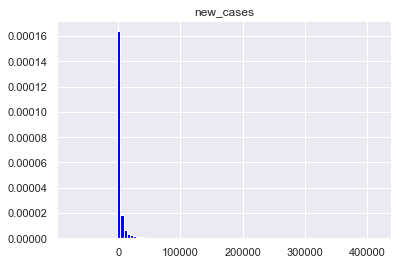

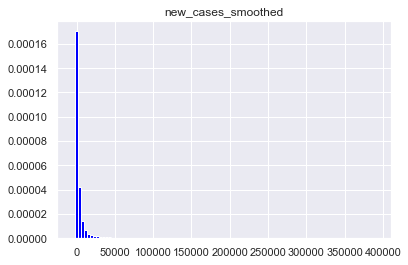

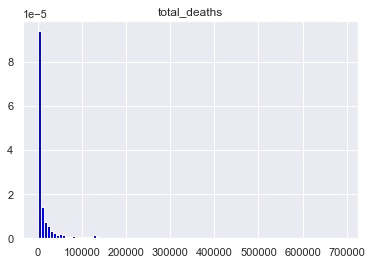

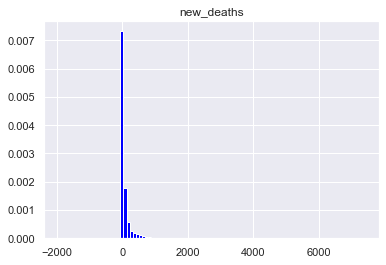

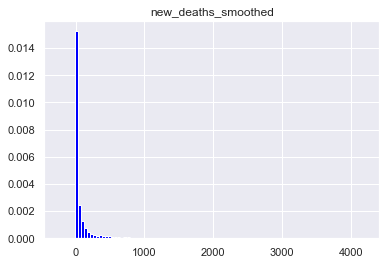

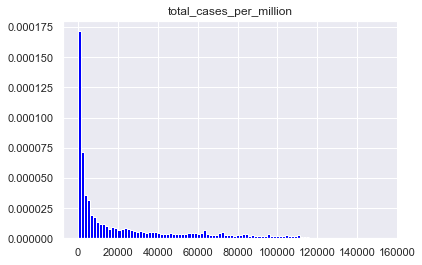

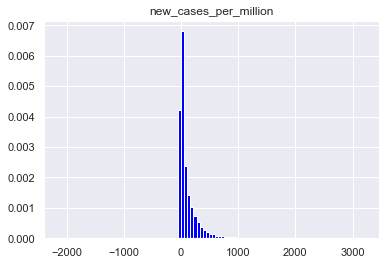

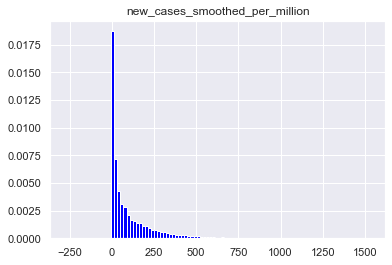

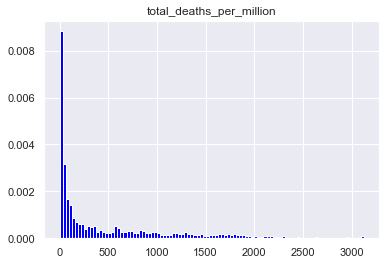

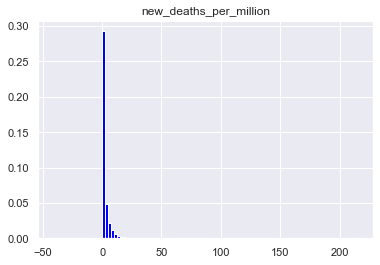

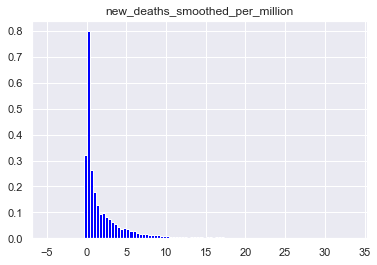

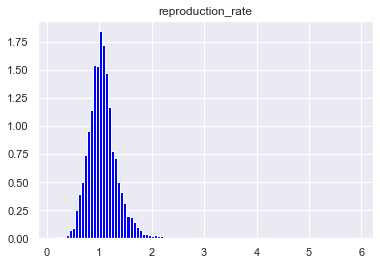

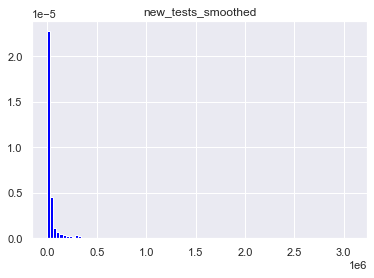

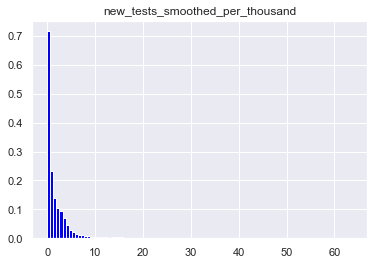

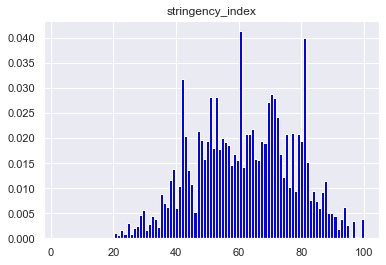

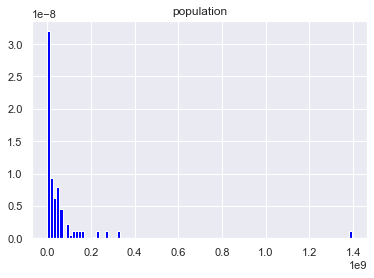

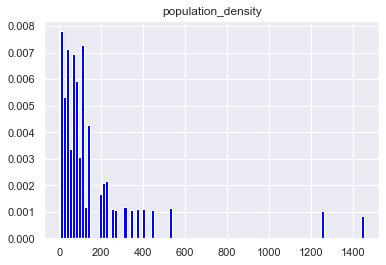

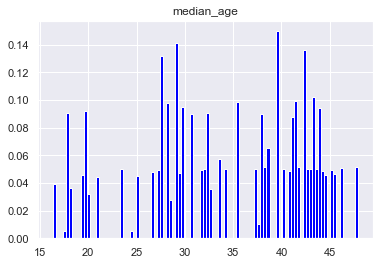

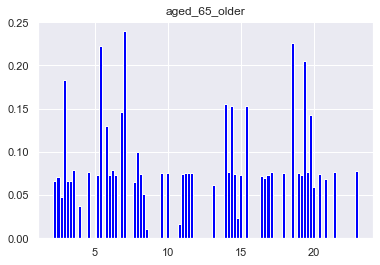

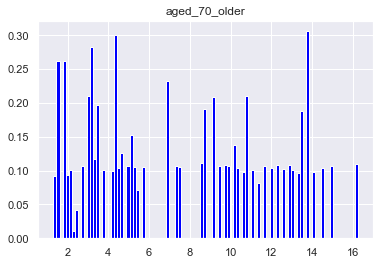

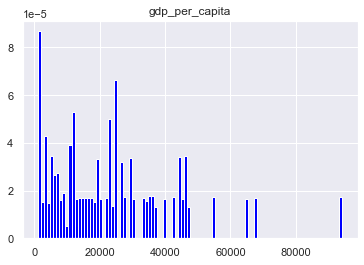

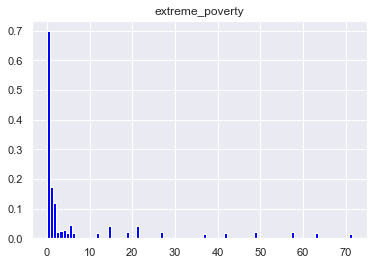

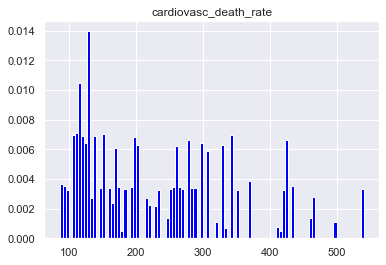

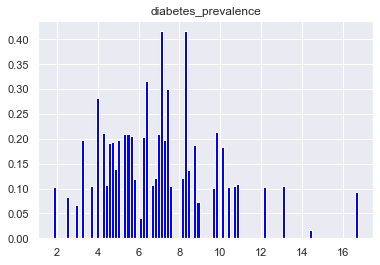

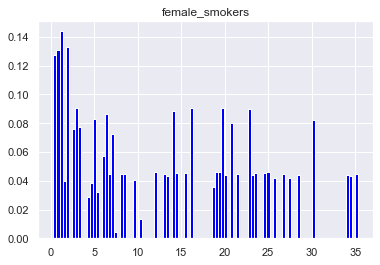

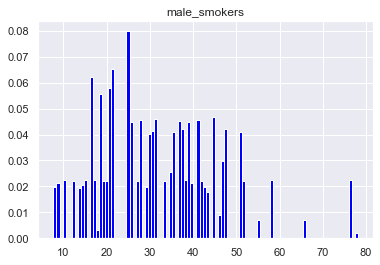

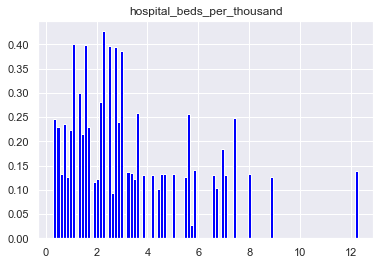

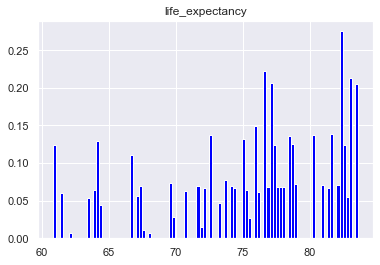

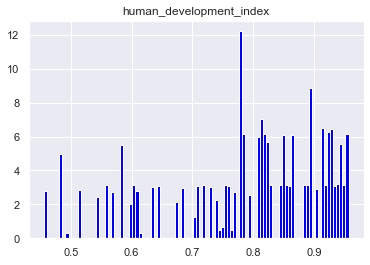

In [25]:
from scipy.stats import norm


def gaussian_plot(data, atribute):    
    mitjana = np.unique(data[atribute]).mean()
    desviacio_tipica = np.unique(dataset[atribute]).std()
    
    plt.plot(np.unique(data[atribute]), norm.pdf(np.unique(data[atribute]), mitjana, desviacio_tipica))
    plt.hist(data[atribute], density=True, bins=100, color='blue')
    plt.title(atribute)
    plt.show()

# Fem el plot per a totes les caracterísiques de la BBDD
for atr in data.columns:
    gaussian_plot(data, atr)

#### 10. Quin és l'atribut objectiu? Per què?

L'objectiu final de qualsevol regressor lineal és aconseguir una predicció del comportament d'unes determinades dades en un futur.

En aquest cas en concret és molt recomanable l'estudi de com evoluciona la pandèmia en determinades situacions i poder entrenar de la manera més precisa el nostre model per tal d'estar preparats per a les decisions futures. Pel que fa a aquesta malaltia, és indispensable la detecció tan anticipada com sigui possible (positive_rate) per tal d'evitar contagis i, en conseqüència, morts **(new_deaths)**.

## B. Ús de regressor Lineal (40%)


Funcions a tenir en compte

* [data preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)

* [sklearn.pipeline.make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

* [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

* [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

* [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)



### Preguntes a respondre
0. Separa el cjt d'aprenentatge i el de test. Els errors sempre seran sobre el de test.
1. Aprén un Regressor Lineal amb totes les característiques. Quins son els atributs més rellevants per a la regressió?
2. Calcula l'error quadràtic mitjà del regressor per a cada un dels atributs de la base de dades. Quin atribut té l'error més baix. Mostra'ls. Estan relacionats amb la resposta anterior?
3. És millor o pitjor que utilitzant totes les dades? Per què?
4. Tenen alguna relació els atributs amb distribucions Gaussianes i els que tenen un error més petit?
5. Què passa si normalitzes les dades? El error és més baix? 
6. Significa això que el regressor és més precís? Passa el mateix amb altres mètriques?
7. Heu après un LinearRegression o un SGDRegressor? Sabeu quines diferencies hi ha? Compareu-los [Pista](https://stackoverflow.com/questions/34469237/linear-regression-and-gradient-descent-in-scikit-learn-pandas)
8. Compara el resultat del punt 1 amb el descens del gradient, en error i temps d'entrenament.


In [26]:
def normalitzador_de_dades(data, tipos_normalitzacio = 0):
    if tipos_normalitzacio == 0:
        normalized_data = (data-data.min())/(data.max()-data.min())
    elif tipos_normalitzacio == 1:
        normalized_data = (data-data.mean())/data.std()

    return normalized_data


from sklearn.model_selection import train_test_split
def separar_train_test(data, target, ratio=0.8):
    data_no_target = data.drop(target, axis=1) # eliminem atribut objectiu
    x_train, x_test, y_train, y_test = train_test_split(data_no_target, data[target], test_size= 1-ratio, shuffle=True, random_state=0)
    
    return x_train, x_test, y_train, y_test


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
def aplicar_regressor_lineal(data, target):
    x_train, x_test, y_train, y_test = separar_train_test(data, target)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    
    return y_pred, y_test
    
    
def calcula_metrica_error(y_predict, y_test, tipus):
    if tipus == "mse":
        return mean_squared_error(y_test, y_predict)
    elif tipus == "r2":
        return r2_score(y_test, y_predict)
    else:
        print ("Metrica {} no reconeguda".format(tipus))
        return -1


In [27]:
data_regresor = data.copy(deep=True)
data_regresor.head(3)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,123.000,19.000,9.714,5.000,1.000,0.571,42.813,6.613,3.381,1.740,0.348,0.199,1.220,40.000,0.014,84.260,2872934.000,104.871,38.000,13.188,8.643,11803.431,1.100,304.195,10.080,7.100,51.200,2.890,78.570,0.795
1,146.000,23.000,12.429,5.000,0.000,0.429,50.819,8.006,4.326,1.740,0.000,0.149,1.190,37.000,0.013,84.260,2872934.000,104.871,38.000,13.188,8.643,11803.431,1.100,304.195,10.080,7.100,51.200,2.890,78.570,0.795
2,174.000,28.000,15.714,6.000,1.000,0.571,60.565,9.746,5.470,2.088,0.348,0.199,1.150,47.000,0.016,84.260,2872934.000,104.871,38.000,13.188,8.643,11803.431,1.100,304.195,10.080,7.100,51.200,2.890,78.570,0.795


#### 0. Separa el cjt d'aprenentatge i el de test. Els errors sempre seran sobre el de test.

In [28]:
target = "new_deaths" 
x_train, x_test, y_train, y_test = separar_train_test(data, target)

print(f"Longuituts:\nx_train: {x_train.shape} - - - - y_train: {y_train.shape}\nx_test: {x_test.shape} - - - - y_test: {y_test.shape}")

Longuituts:
x_train: (28011, 29) - - - - y_train: (28011,)
x_test: (7003, 29) - - - - y_test: (7003,)


Veiem que les dades de test i train s'han barrejat (opció Shuffle=True). Per poder repetir l'experiment amb els mateixos resultats marquem la llavor (random_state=0). Els conjunts estan separats i les mides són correctes.

#### 1. Aprén un Regressor Lineal amb totes les característiques. Quins son els atributs més rellevants per a la regressió?

Els atributs més rellevants seran aquells que estiguin més correlacionats.

In [29]:
def pipeline(data, tipus_error, target):

    y_predict, y_test = aplicar_regressor_lineal(data, target)
    score = calcula_metrica_error(y_predict, y_test, tipus_error)

    return score

target = "new_deaths"
score = pipeline(data_regresor, tipus_error='mse', target=target)
print(f"Target: '{target}' ----> Score: {score}")

Target: 'new_deaths' ----> Score: 5928.848089916656


Veiem que l'error és molt gran, això pot ser degut al fet que les dades no estan en la mateixa escala. Tornarem a predir aquesta característica amb les dades normalitzades i compararem els errors.

#### 2. Calcula l'error quadràtic mitjà del regressor per a cada un dels atributs de la base de dades. Quin atribut té l'error més baix. Mostra'ls. Estan relacionats amb la resposta anterior?

Utilitzem l'error 'mse' (mean squared error), amb aquest, com més a prop estiguem del zero millor. Veiem que per predir la característica 'reproduction_rate' el nostre model ho fa molt bé, tot i no tenir les dades normalitzades.

Anem a provar de predir alguns altres atributs i veurem si aquest error baixa amb les dades normalitzades.

In [30]:
target = list(data_regresor.columns)
total_score = dict()
for col in target: 
    # Calculem la regressió i l'error per cada característica
    score = pipeline(data_regresor, tipus_error='mse', target=col)
    total_score[col] = score

print(sorted(total_score.items(), key=operator.itemgetter(1), reverse=False))

[('human_development_index', 0.0009773970588805223), ('reproduction_rate', 0.08563274054215997), ('aged_70_older', 0.16553365308417073), ('aged_65_older', 0.24057096055499574), ('new_deaths_smoothed_per_million', 1.6999441287769668), ('hospital_beds_per_thousand', 2.1052601646432065), ('median_age', 2.366955195579988), ('life_expectancy', 2.9050933643353356), ('new_deaths_per_million', 3.140595392336039), ('diabetes_prevalence', 3.812412665433692), ('new_tests_smoothed_per_thousand', 16.568071627698618), ('female_smokers', 25.345378262894492), ('extreme_poverty', 51.440820392754105), ('male_smokers', 73.83142416251366), ('stringency_index', 188.55406708586952), ('cardiovasc_death_rate', 3398.063705045389), ('new_cases_smoothed_per_million', 3722.297084735397), ('new_deaths_smoothed', 4450.953437062813), ('new_deaths', 5928.848089916656), ('new_cases_per_million', 7122.421552068263), ('population_density', 39201.07994881464), ('total_deaths_per_million', 59478.99555855914), ('new_cases_

L'atribut amb l'error més baix és 'human_development_index'. Si té relació, ja que aquelles característiques amb error més baix també són les més que tenen més correlació.

> # NORMALITZACIÓ DADES

Normalitzem les dades de dues maneres.

La primera ('normalized_data_0') serà a partir dels màxims i mínims.

La segona (normalized_data_1) serà a partir de la mitjana i la desviació típica.

In [31]:
normalized_data_0 = normalitzador_de_dades(data_regresor) 
normalized_data_1 = normalitzador_de_dades(data_regresor, 1)

In [32]:
target = 'new_deaths'
score_normalized_0 = pipeline(normalized_data_0, tipus_error= 'mse', target=target)
print(f"Target: '{target}' ----> Score: {score_normalized_0}")

Target: 'new_deaths' ----> Score: 6.866760822391174e-05


In [33]:
target = 'new_deaths'
score_normalized_1 = pipeline(normalized_data_1, tipus_error= 'mse', target=target)
print(f"Target: '{target}' ----> Score: {score_normalized_1}")

Target: 'new_deaths' ----> Score: 0.06999361922979828


#### 3. Què passa si normalitzes les dades? El error és més baix? 

Com hem dit, l'error en la primera predicció era l'escala de la nostra BBDD. Un cop normalitzada, la predicció és satisfactòria. A més, veiem que l'error és molt més utilitzant la normalització amb mínims i màxims.


#### 4. Heu après un LinearRegression o un SGDRegressor? Sabeu quines diferencies hi ha? Compareu-los [Pista](https://stackoverflow.com/questions/34469237/linear-regression-and-gradient-descent-in-scikit-learn-pandas)

El regressor lineal empra la llei dels mínims quadrats ordinaris de Scipy, tenen una solució tancada (solució analítica).

D'altra banda el regressor SGDC utilitza el descens del gradient estocàstic, és a dir, una solució aproximada basada en les dades repetint un nombre d'iteracions determinat. En aquesta pràctica hem treballat la LinearRegression.

In [34]:
from sklearn.linear_model import SGDRegressor
def aplicar_regresor_sgd(data, target, tipus_error):
    x_train, x_test, y_train, y_test = separar_train_test(data, target)
    
    sgdr  = SGDRegressor()
    sgdr.fit(x_train, y_train)
    y_pred = sgdr.predict(x_test)
    score = calcula_metrica_error(y_pred, y_test, tipus_error)

    return score

target = 'new_deaths'
score_sgd = aplicar_regresor_sgd(normalized_data_0, target, 'mse')
score_lr = pipeline(normalized_data_0, target=target, tipus_error='mse')

print(f"Score LR: {score_lr}\nScore SGD: {score_sgd}")

Score LR: 6.866760822391174e-05
Score SGD: 0.0003213659541593332


En aquest cas, per aquesta característica, l'error és inferior utilitzant el LinearRegresion.

## C. Demostració d'assoliment (A+B en una nova BBDD) (20%)

La puntuació d'aquesta secció dependrà de la originalitat, i el treball realizat l'analisis i procesat d'una base de dades alternativa de lliure elecció. Recordeu que podeu reaprofitar la majoria del codi si ho heu implementat en funcions.


##### 1. Dimensionalitat de la BBDD. Quants exemples, quantes caracteristiques tenim.
La BBDD amb la qual estem treballant té 2938 files i 22  columnes. Es a dir, tenim 2938 mostres diferents amb 22  característiques cadascuna.

In [35]:
dataset_path_life = "life_expectancy_data.csv"
data_life = pd.read_csv(dataset_path_life, header=0, delimiter=',')
row, col = data_life.shape

print(f"Dimensions BD\nFiles: {row}\nColumnes: {col}")
print(f"En total hi han: {len(data_life.columns)} característiques.")
data_life.head()


Dimensions BD
Files: 2938
Columnes: 22
En total hi han: 22 característiques.


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,19.100,83,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,18.600,86,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,18.100,89,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,17.600,93,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,17.200,97,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


> ## Filtratge 
> ### Tipos de dades

##### 2. Com són les caracteristiques?

En aquesta primera aproximació, veiem que del total de 22 característiques, 18 d'aquestes són numèriques. Per tant, només haurem de tractar o esborrar les dues restants.

In [36]:
data_life = data_life.rename(columns={'Life expectancy ': 'life_expectacy'}, index={'ONE': 'Row_1'})
dataTypeSeries = dataset_types(data_life)

float64    16
int64       4
object      2
dtype: int64


> ### Dades nules

#### 3. Hi tenim totes les dades (quin % de dades tenim). Neteja les dades que puguin usar-se per aprendre.

Quant a dades nul·les, veiem que aquest dataset està molt més net que el de la COVID-19. En aquest cas, com no hi ha cap columna on quasi la majoria dels valors són nul, no val la pena esborrar característiques. En aquest cas, tot el filtratge serà per files.

{'Population': 22.19,
 'Hepatitis B': 18.82,
 'GDP': 15.25,
 'Total expenditure': 7.69,
 'Alcohol': 6.6,
 'Income composition of resources': 5.68,
 'Schooling': 5.55,
 ' thinness 5-9 years': 1.16,
 ' thinness  1-19 years': 1.16,
 ' BMI ': 1.16,
 'Polio': 0.65,
 'Diphtheria ': 0.65,
 'life_expectacy': 0.34,
 'Adult Mortality': 0.34,
 ' HIV/AIDS': 0.0,
 'Country': 0.0,
 'Year': 0.0,
 'Measles ': 0.0,
 'percentage expenditure': 0.0,
 'infant deaths': 0.0,
 'Status': 0.0,
 'under-five deaths ': 0.0}

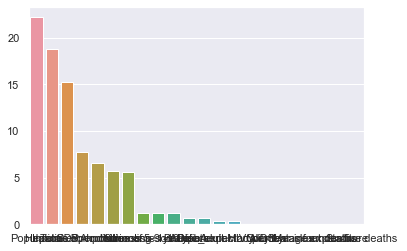

In [37]:
percent_data_missing = percent_null(data_life)
percent_data_missing

> ### Neteja de Dades (Nan's i no numeriques)

#### 4. Neteja les dades que ens siguin útils. 

In [55]:
data_life = remove_no_numeric(data_life)
data_life = remove_null_data(data_life)
data_life.shape

float64    16
int64       4
dtype: int64


(1649, 20)

Tanmateix com en l'anterior BBDD. Aquí també preferim fer una neteja més profunda a canvi de perdre dades en lloc de inventarse-les (fer la mitjana dels valors i posar-la on hi ha Nan's). Utilitzem aquest criteri, ja que l'esperança de vida pot variar molt depenent del país i altres factors. Si agaféssim la mitjana els resultats que obtinguéssim no serien reals.

> ## Anàlisi

Visualitzem les dades per veure com estàn quedant

In [39]:
data_life.head()

,Year,life_expectacy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.000,263.000,62,0.010,71.280,65.000,1154,19.100,83,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,2014,59.900,271.000,64,0.010,73.524,62.000,492,18.600,86,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,2013,59.900,268.000,66,0.010,73.219,64.000,430,18.100,89,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,2012,59.500,272.000,69,0.010,78.184,67.000,2787,17.600,93,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,2011,59.200,275.000,71,0.010,7.097,68.000,3013,17.200,97,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


<AxesSubplot:>

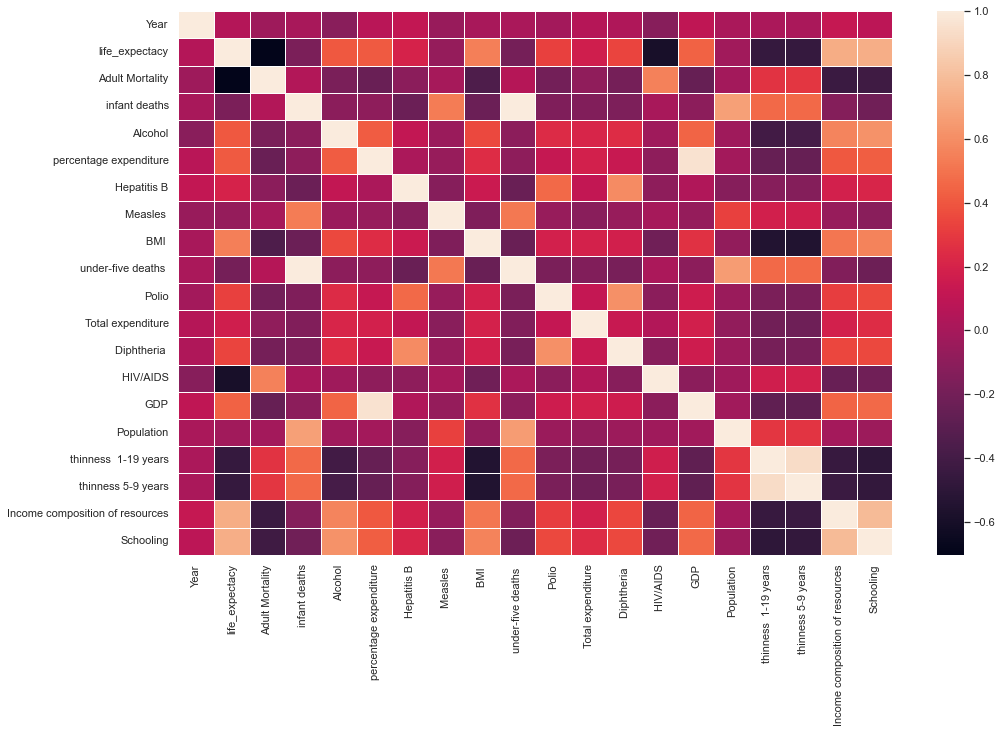

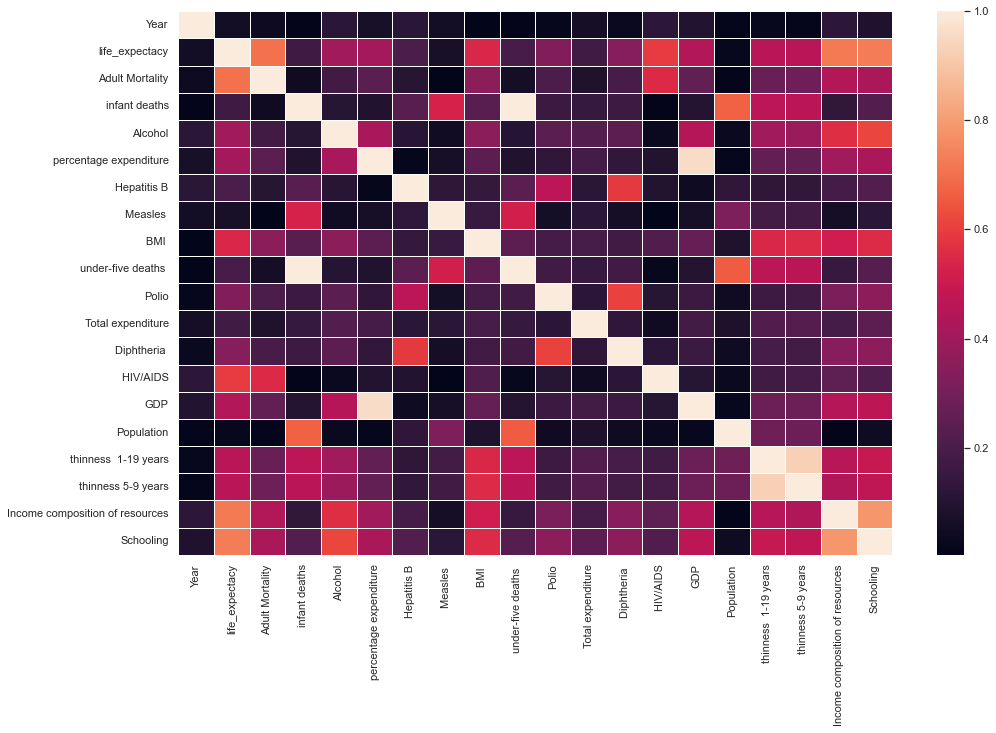

In [40]:
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(data_life.corr(), annot=False, fmt="f", linewidths=.5, ax=ax)
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(abs(data_life.corr()), annot=False, fmt="f", linewidths=.5, ax=ax) # En valor absolut (interesa agafar caracterísitques que no estiguin correlacionades ni directa ni indirectament)

Podem veure que el nostre mapa de calor està complet i no hi ha punts grisos excepte la diagonal (ja que és la correlació de l'atribut amb ell mateix).

Tot i això, aquest mapa de calor conté totes les característiques de la nostra BBDD, a nosaltres només ens interessen les que estiguin més correlacionades. Anem a fer una funció per veure aquelles correlacions més grans o iguals a 0.6, més petites o iguals a -0.6 (sense la diagonal).

En aquest cas marquem 0.6 com a threeshold, ja que les característiques no estan tan correlacionades com en l'altra BBDD.

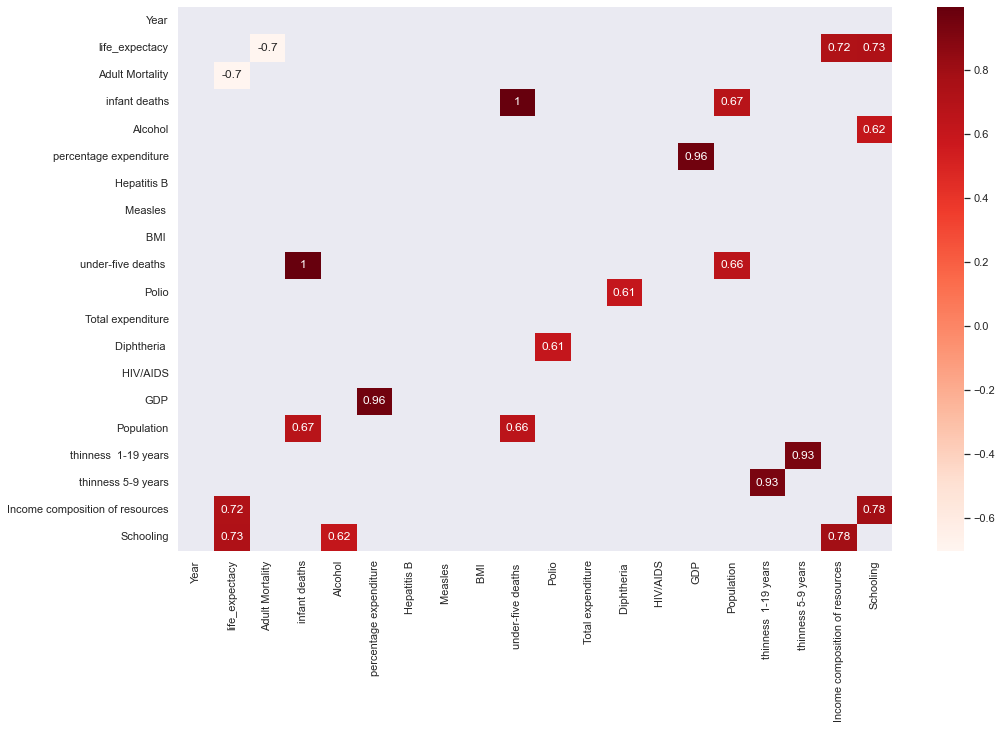

In [41]:
data_corr_life, filtered_data_life = heatmap_high_corr(data_life, thres=0.6)

#### 6. Mostra els atributs més rellevants. (llista de parelles d'atributs ordenada per correlació)

En el mapa de calor de dalt destaquem només aquelles característiques amb les correlacions més allunyades del 0, per tant, les més significants. Així i tot, en tenir tantes característiques, és difícil veure-ho de forma gràfica.

In [42]:
sorted_corr_life = ordened_corr(filtered_data_life)
sorted_corr_life

infant deaths                    under-five deaths                 0.997
GDP                              percentage expenditure            0.959
 thinness 5-9 years               thinness  1-19 years             0.928
Schooling                        Income composition of resources   0.785
life_expectacy                   Schooling                         0.728
Income composition of resources  life_expectacy                    0.721
life_expectacy                   Adult Mortality                   0.703
Population                       infant deaths                     0.672
                                 under-five deaths                 0.659
Alcohol                          Schooling                         0.617
Polio                            Diphtheria                        0.609
Year                             Year                                NaN
dtype: float64

D'aquesta llista de paraules el més destacable és la correlació entre la **esperança de vida** i la **escolarització** i la **morositat adulta**.

> ## Gràfiques

#### 7. Mostra (almenys) 3 tipus diferents de gràfiques sobre les dades.

<AxesSubplot:xlabel='Year'>

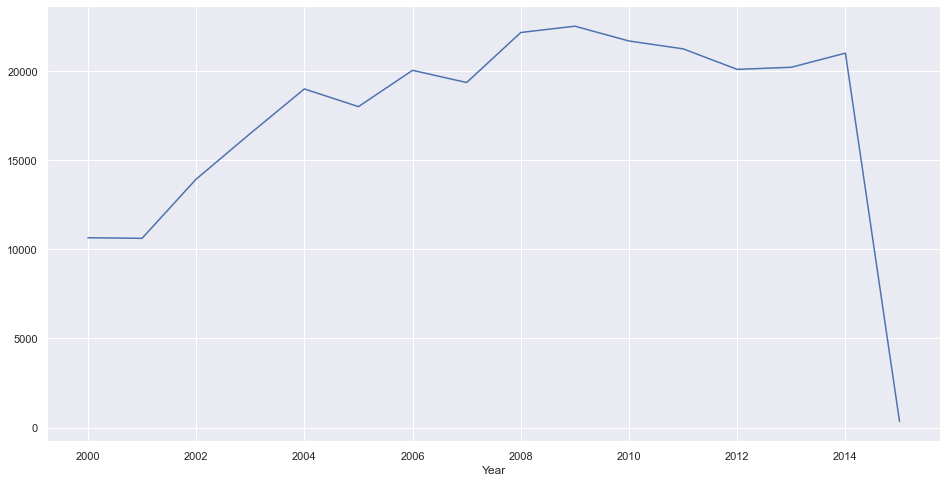

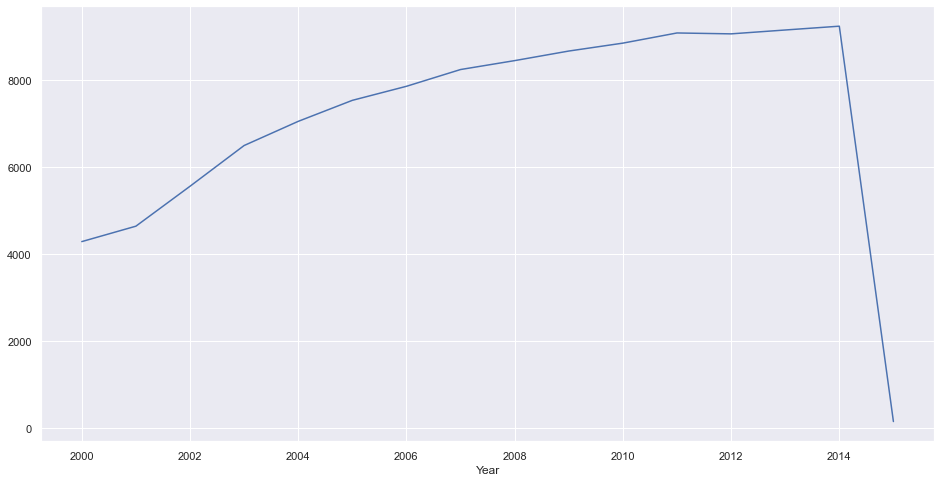

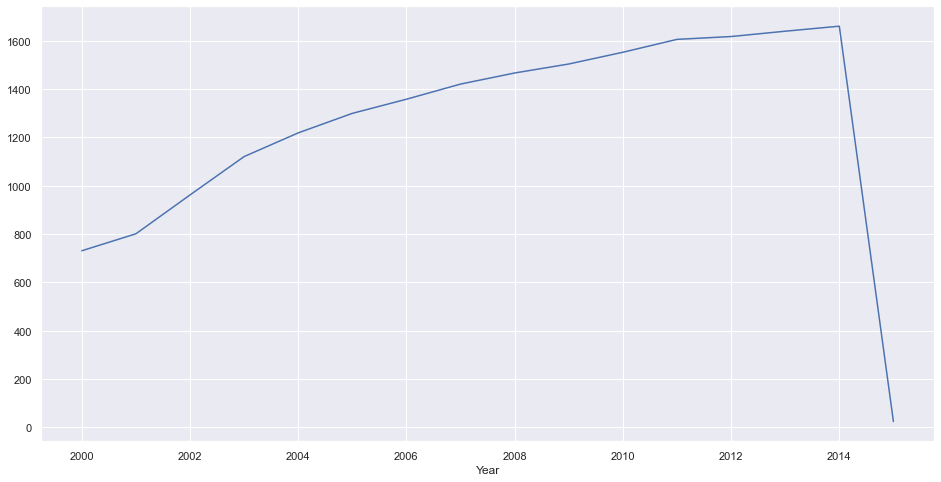

In [43]:
f, ax = plt.subplots(figsize=(16, 8))
data_life.groupby('Year').sum()["Adult Mortality"].plot(kind='line')
f, ax = plt.subplots(figsize=(16, 8))
data_life.groupby('Year').sum()["life_expectacy"].plot(kind='line')
f, ax = plt.subplots(figsize=(16, 8))
data_life.groupby('Year').sum()["Schooling"].plot(kind='line')

En les gràfiques podem veure que tant l'escolarització com l'esperança de vida incrementen lleugerament cada any. La morositat adulta també sembla que creix cada any, però no es veu de forma tan clara com les altres, necessitaríem més dades per poder afirmar-ho.

<AxesSubplot:xlabel='Income composition of resources', ylabel='life_expectacy'>

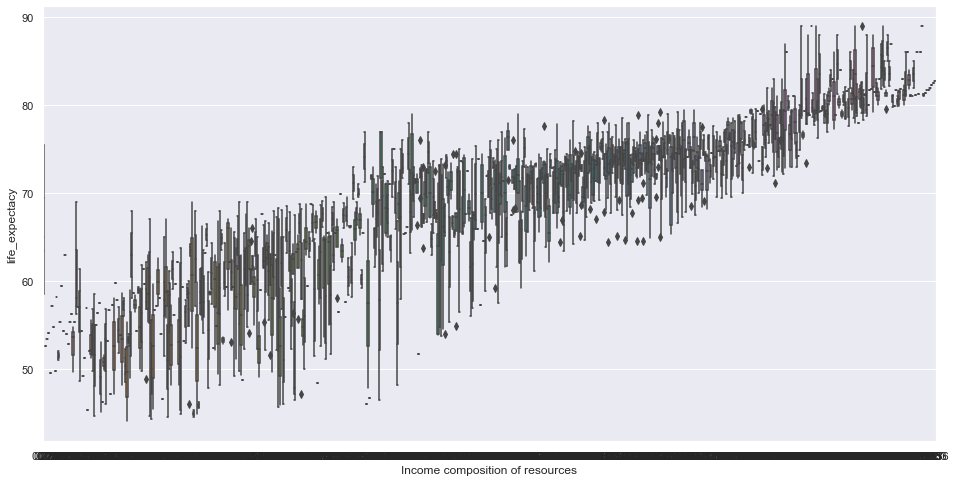

In [44]:
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data= data_life, x='Income composition of resources', y='life_expectacy')

Veient la llista de parelles amb més correlacions, veiem que les dues característiques de la gràfica tenien molta correlació. En un primer anàlisi, amb ajuda d'aquesta gràfica, podem afirmar que la característica **ingresos dels recursos** té un impacte positiu en la **esperança de vida** de les persones.

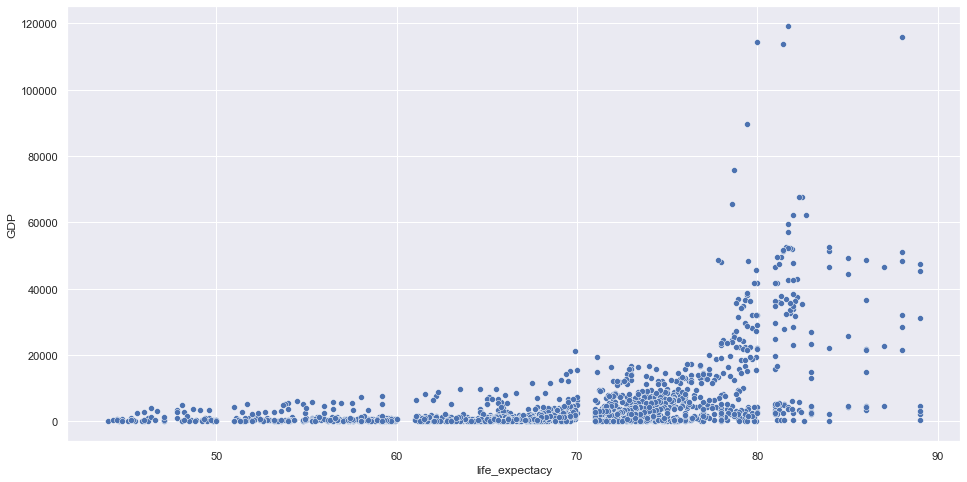

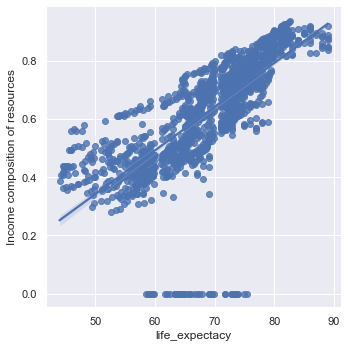

In [45]:
f, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(data=data_life, x="life_expectacy", y="GDP")
sns.lmplot(data=data_life, x="life_expectacy", y="Income composition of resources")

En la primera gràfica no tenim prou evidència per dir que la **Renta per cápita (GPD)** té un impacte en la **esperança de vida** de les persones per general. En canvi, si podem dir que tots els valors alts de GPD tenen una esperança de vida alta.

En la segona gràfica reafirmem el que hem explicat en la gràfica del bloc de codi d'abans.

#### 8. Els valors es troben tots a la mateixa escala? Ens importa?

Com abans, en aquesta BBDD les característiques tampoc es troben en la mateixa escala. Per exemple, veiem que **percentage expenditure** té un rang tan ampli com 7.000 - 80.000. També ho veiem en la població, on els valors són molt diferents entre ells. Mentre que tenim característiques com 'infants deaths' amb valors molt petits comparats amb altres atributs.

La solució a aquesta descompensació de les dades és la **normalització**.

#### 10. Quin és l'atribut objectiu? Per què?

L'objectiu final de qualsevol regressor lineal és aconseguir una predicció del comportament d'unes determinades dades en un futur.

En aquest cas en concret el que ens interessa predir és l'esperança de vida. Poder predir satisfactòriament aquesta dada podria tenir impactes mèdics, polítics, econòmics, etc.

> ## Assoliment part B amb nova BBDD

#### 0. Separa el cjt d'aprenentatge i el de test. Els errors sempre seran sobre el de test.

In [46]:
target = "life_expectacy" # per exemple
x_train, x_test, y_train, y_test = separar_train_test(data_life, target)

print(f"Longuituts:\nx_train: {x_train.shape} - - - - y_train: {y_train.shape}\nx_test: {x_test.shape} - - - - y_test: {y_test.shape}")

Longuituts:
x_train: (1319, 19) - - - - y_train: (1319,)
x_test: (330, 19) - - - - y_test: (330,)


#### 1. Aprén un Regressor Lineal amb totes les característiques. Quins son els atributs més rellevants per a la regressió?

In [47]:
target = "life_expectacy"
score = pipeline(data_life, tipus_error='mse', target=target)
print(f"Target: '{target}' ----> Score: {score}")

Target: 'life_expectacy' ----> Score: 12.5734272489678


Com en l'altre BBDD, veiem que l'error és molt gran, això pot ser degut al fet que les dades no estan en la mateixa escala. Tornarem a predir aquesta característica amb les dades normalitzades i compararem els errors.

#### 2. Calcula l'error quadràtic mitjà del regressor per a cada un dels atributs de la base de dades. Quin atribut té l'error més baix. Mostra'ls. Estan relacionats amb la resposta anterior?

Utilitzem l'error 'mse' (mean squared error), amb aquest, quan més a prop estiguem del zero millor. Veiem que per predir la característica 'reproduction_rate' el nostre model ho fa molt bé, tot i no tenir les dades normalitzades.

Anem a provar de predir alguns altres atributs i veurem si aquest error baixa amb les dades normalitzades.

In [48]:
target = list(data_life.columns)
total_score = dict()
for col in target:  
    score = pipeline(data_life, tipus_error='mse', target=col)
    total_score[col] = score

print(sorted(total_score.items(), key=operator.itemgetter(1), reverse=False))

[('Income composition of resources', 0.007158230591915723), ('Schooling', 2.1442443224311267), (' thinness 5-9 years', 2.6618833783235485), (' thinness  1-19 years', 2.7078599930753984), ('Total expenditure', 4.898469675052806), ('Alcohol', 7.727739331861076), ('life_expectacy', 12.5734272489678), ('Year', 14.248070659331715), (' HIV/AIDS', 24.54680153237695), ('infant deaths', 109.67622183452544), ('Diphtheria ', 181.29991669067587), ('under-five deaths ', 191.7598570622934), ('Polio', 245.14482799349813), (' BMI ', 287.0048413495538), ('Hepatitis B', 387.2043033518439), ('Adult Mortality', 9944.422342943359), ('percentage expenditure', 416475.1684854388), ('GDP', 16818762.424179804), ('Measles ', 91108951.0525644), ('Population', 3920864592438467.5)]


La característica amb l'error més petit és 'Income composition of resources'

> ## NORMALITZACIÓ DADES amb nova BBDD

In [49]:
normalized_data_life_0 = normalitzador_de_dades(data_life)
normalized_data_life_1 = normalitzador_de_dades(data_life, 1)

In [50]:
target = 'life_expectacy'
score_normalized_life_0 = pipeline(normalized_data_life_0, tipus_error= 'mse', target=target)
print(f"Target: '{target}' ----> Score: {score_normalized_life_0}")

Target: 'life_expectacy' ----> Score: 0.006209099876063057


In [51]:
target = 'life_expectacy'
score_normalized_life_1 = pipeline(normalized_data_life_1, tipus_error= 'mse', target=target)
print(f"Target: '{target}' ----> Score: {score_normalized_life_1}")

Target: 'life_expectacy' ----> Score: 0.1624803576872306


#### 3. Què passa si normalitzes les dades? El error és més baix? 

Un altre cop el problema era l'escala de la BBDD, normalitzant les dades l'error ha baixat. A més, l'error utilitzant màxims i mínims torna a ser més baix respecte a l'error utilitzant la mitjana i desviació típica.

#### 4. Heu après un LinearRegression o un SGDRegressor?

In [52]:
target = 'life_expectacy'
score_sgd = aplicar_regresor_sgd(normalized_data_life_0, target, 'mse')
score_lr = pipeline(normalized_data_life_0, target=target, tipus_error='mse')

print(f"Score LR: {score_lr}\nScore SGD: {score_sgd}")

Score LR: 0.006209099876063057
Score SGD: 0.013301906310210849


Un cop més el error també torna a ser més baix amb el LinearRegressor.

## D. Implementació Regressor Lineal (20%)

En aquest exercici, es tracta d'implementar en python el procés de descens del gradient explicat a les classes de teoria, i comparar-lo amb els resultats obtinguts amb l'apartat (B). 

$$J(\theta) = \frac{1}{2m} \left[ \sum^m_{i=1}(f(x^{i}; \theta) - y^{i})^2 + \lambda\sum_{j=1}^{n}(\theta_{j}^2) \right]$$

Fixeu-vos que $J$ retorna el `mse`. Per a trobar $w_j$, repetir fins convergència:
$$\theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; \theta)-y^{i}) \cdot 1$$
$$\theta_j = \theta_j - \alpha \left[\frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; \theta)-y^{i}) \cdot x_{j}^{i} - \frac{\lambda}{m}\theta_{j} \right]$$


ó:

$$\theta_{j} := \theta_{j} \left(1-\alpha \frac{\lambda}{m} \right) - \alpha\frac{\lambda}{m} \sum_{i=1}^{m}(f(x^{i}; \theta)-y^{i}) \cdot x_{j}^{i}$$

On si considerem un regressor lineal (el model és una recta), llavors $\theta_0$ i $\theta_1$ representen, respectivament, la $b$ i $a$ de la fòrmula de la recta: 

$$h_\theta(x^{(i)}) = ax + b$$

$\alpha$ és el learning rate, i $h_\theta(x^{(i)})$ és la funció que fa la regressió, és a dir, la funció que prediu el valor de $y^{(i)}$ donat un(s) atribut(s) concret(s) $x^{(i)}$.

Així, tenint calculat el model en l'últim punt del primer exercici, ja sabeu quin resultat hauríeu d'obtenir. O no, perquè la vostra implementació pot ser millor! En concret, es tracta de desenvolupar aquestes tasques:

* Definir la funció de cost i del gradient

* Estudiar com l'ús de regularitzadors afecta el resultat: overfitting, underfitting, etc. 

* Visualització de les dades a analitzar i explicació pas a pas del procediment   

* Visualització del procés de descens de gradient 

* Modificar el learning rate i el nombre d'iteracions 

<img src="https://miro.medium.com/max/810/1*UUHvSixG7rX2EfNFTtqBDA.gif">

Per a la implementació us podeu basar en el següent esquelet:

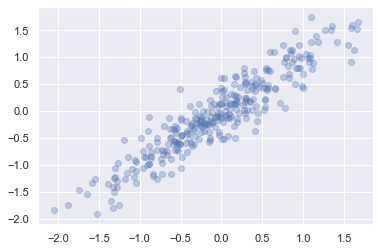

Iter 1: error 0.5455265297407416
Iter 2: error 0.5405614647168313
Iter 3: error 0.5356500533959582
Iter 4: error 0.5307916919124799
Iter 5: error 0.5259857836555119
Iter 6: error 0.5212317391733909
Iter 7: error 0.5165289760795398
Iter 8: error 0.511876918959711
Iter 9: error 0.5072749992805871
Iter 10: error 0.5027226552997144
Iter 11: error 0.4982193319767515
Iter 12: error 0.4937644808860072
Iter 13: error 0.4893575601302501
Iter 14: error 0.48499803425576876
Iter 15: error 0.48068537416866075
Iter 16: error 0.47641905705233273
Iter 17: error 0.472198566286192
Iter 18: error 0.46802339136550763
Iter 19: error 0.4638930278224272
Iter 20: error 0.4598069771481253
Iter 21: error 0.45576474671607126
Iter 22: error 0.45176584970639266
Iter 23: error 0.4478098050313221
Iter 24: error 0.44389613726170696
Iter 25: error 0.4400243765545656
Iter 26: error 0.4361940585816751
Iter 27: error 0.43240472445917266
Iter 28: error 0.4286559206781545
Iter 29: error 0.42494719903625805
Iter 30: error 0

In [53]:

class Regressor(object):
    def __init__(self, alpha=1e-2):
        # Inicialitzem w
        self.w = None
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def __str__(self):
        return "Parametres Regressor \n\t bias (o intercept_): {} \n\t w (o coef_): {}".format(self.w[0], self.w[1:])

    def __initialize_w(self, n_vars):
        self.d = n_vars
        # diferents formes d'inicialitzar els pesos
        # self.w = np.random.random(n_vars)
        # self.w = np.random.normal(0, .1, size=n_vars)
        self.w = np.zeros(n_vars)

    def score(self, x, y):
        return self.__loss(self.predict(x), y)

    def predict(self, x):
        # implementar aqui la funció de prediccio
        return np.dot(x, self.w[1:]) + self.w[0]

    def __loss(self, h, y):
        # mse
        return np.mean((h-y)**2)

    def __update(self, x, y):
        # actualitzar aqui els pesos donada la x i la y real.
        h = self.predict(x)
        n_samples = len(y)

        # calcular gradient w..
        gradient = np.dot((h-y), np.hstack([np.ones((n_samples, 1)), x])) / n_samples

        # actualitzar w0 amb alpha
        self.w = self.w - self.alpha * gradient

        # retornar el error
        return self.score(x, y)

    def fit(self, x, y, max_iter=1000, epsilon=1e-5):
        if len(x.shape) > 1:
            n_vars = x.shape[1]
        else:
            raise AttributeError("Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.")

        y = y.ravel()

        self.__initialize_w(n_vars+1)

        current_error = self.score(x, y)
        last_error = current_error + epsilon * 10

        iter = 0
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        while iter < max_iter and abs(last_error - current_error) > epsilon:
            last_error = current_error
            current_error = self.__update(x, y)
            iter += 1
            print("Iter {}: error {}".format(iter, current_error))

        print("Trained in {} iters: error {} ({:.7f} epsilon)".format(iter, current_error, abs(last_error - current_error)))
        self.coef_ = self.w[1:]
        self.intercept_ = self.w[0]

        pass

if __name__ == "__main__":
    # GENERATE DATA

    ns = 300  # samples
    nf = 2    # attributes

    # rng = np.random.RandomState(0)
    # X_sample = rng.randn(ns, nf)

    X1 = np.random.randn(ns, nf)  # Random points sampled from a univariate “normal” (Gaussian) distribution
    A = np.array([[0.6, .4], [.4, 0.6]])
    X2 = np.dot(X1, A)

    # VISUALIZE DATA
    plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3)  # alpha, blending value, between 0 (transparent) and 1 (opaque).
    plt.show()

    X = X2[:, 0].reshape(-1, 1)
    Y = X2[:, 1]

    our_model = Regressor()
    our_model.fit(X, Y)
    y_our_pred = our_model.predict(X)

    print(our_model)
    print("ERROR IN MY MODEL:", mean_squared_error(Y, y_our_pred))

    from sklearn.linear_model import LinearRegression

    model = LinearRegression()
    model.fit(X, Y)
    y_pred = model.predict(X)

    print("ERROR IN SKLEARN MODEL:", mean_squared_error(Y, y_pred))


    from sklearn.linear_model import SGDRegressor

    sgd_model = SGDRegressor()
    sgd_model.fit(X, Y)
    y_sgd_pred = sgd_model.predict(X)

    print("ERROR IN SKLEARN SGD MODEL:", mean_squared_error(Y, y_sgd_pred))

    sgd_model2 = SGDRegressor(loss='squared_loss', learning_rate='constant', eta0=1e-3, alpha=0)
    sgd_model2.fit(X, Y)
    y_sgd_sim_pred = sgd_model2.predict(X)

    print("ERROR IN SKLEARN SGD MODEL similar:", mean_squared_error(Y, y_sgd_sim_pred))
    print("COEF:", sgd_model2.coef_)
    print("INTERCEPT:", sgd_model2.intercept_)


## (Extra) Implementació Regresor polinomial (+10%, max: 10pts)
1. Quins parametres heu de cambiar al vostre Regressor per tal de poder predir amb funcions polinomials?
2. Quines funcions polinomials (de diferent grau, de diferents combinacions d'atributs, ...) heu escollit per ser apreses amb el vostre descens del gradient? quina ha donat el millor resultat (en error i rapidesa en convergència)?
3. Utilitzeu el regularitzador en la fòrmula de funció de cost i descens del gradient i proveu polinomis de diferent grau. Com afecta el valor del regularitzador?
4. Té sentit el model (polinomial) trobat quan es visualitza sobre les dades? 
